In [1]:
import os
import nltk
from nltk.util import ngrams
import pickle
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from scipy.stats import ttest_rel

from tools.corpus_reader import CHILDESCorpusReader
from tools.functions import nansem, turns, turn_pairs
from tools.measures import dlg_mul, dlg_mwl, shared_ngrams, diff_matrix, \
conv_matrix, global_rate, local_rate

np.random.seed(42)

# read Brown corpus
nltk.data.path.append(os.getcwd() + '/data/nltk_data/')
corpus_root = nltk.data.find('corpora/childes/data-xml/Eng-USA')
brown = CHILDESCorpusReader(corpus_root, 'Brown/.*.xml')

# dialogue files for Adam and Sarah
adam_dlgs = [fileID for fileID in brown.fileids() if 'Adam' in fileID]
sarah_dlgs = [fileID for fileID in brown.fileids() if 'Sarah' in fileID]

In [2]:
dlg_files = adam_dlgs
for dlg_file in dlg_files:
    print(dlg_file)
    dlg_sents = brown.sents(dlg_file)
    print(dlg_sents)
    break

Brown/Adam/020304.xml
[['CHI', ['play', 'checkers']], ['CHI', ['big', 'drum']], ...]


## Extract turn pairs for all dialogues

In [ ]:
# # load files for Adam or Sarah
# name = 'sarah'
# dlg_files = sarah_dlgs

# ages = []
# sent_turn_pairs = {}
# postag_turn_pairs = {}

# # extract turn pairs (for words and POS tags) and pickle to file
# for dlg_file in dlg_files:
#     dlg_sents = brown.sents(dlg_file)
#     tagged_sents = brown.tagged_sents(dlg_file)
#     dlg_postags = [[spkID, [w[1] for w in utt]]
#               for spkID, utt in tagged_sents]
    
#     age = round(float(brown.age(dlg_file, month=True)[0]), 2)
#     if age in ages:
#         age += 0.01
#     ages.append(age)
#     print(age)
    
#     sent_turnp = turn_pairs(turns(dlg_sents))
#     sent_turn_pairs[age] = sent_turnp
    
#     postag_turnp = turn_pairs(turns(dlg_postags))
#     postag_turn_pairs[age] = postag_turnp
    
#     pickle.dump(sent_turn_pairs, open(name + '_sent_turn-pairs.pkl', 'wb'))
#     pickle.dump(postag_turn_pairs, open(name + '_pos_turn-pairs.pkl', 'wb'))

### Turn Pairs Child-Adult (Child first version)

In [ ]:
# def turn_pairs_child_adult(turn_measures):
#     """
#     This extracts sequential (CHI, ADT) pairs from the dialogue, 
#     to compute the recurrence plot measures over.
    
#     Note: includes investigator turns!
#     """
#     turn_pairs = []
#     for i, turn in enumerate(turn_measures[:-1]):
#         if turn[0] == 'CHI' and turn_measures[i+1][0] != 'CHI':
#             turn_pairs.append([turn, turn_measures[i+1]])
#     return turn_pairs



# # load files for Adam or Sarah
# name = 'adam'
# dlg_files = adam_dlgs

# ages = []
# sent_turn_pairs_child_adult = {}
# postag_turn_pairs_child_adult = {}

# # extract turn pairs (for words and POS tags) and pickle to file
# for dlg_file in dlg_files:
#     dlg_sents = brown.sents(dlg_file)
#     tagged_sents = brown.tagged_sents(dlg_file)
#     dlg_postags = [[spkID, [w[1] for w in utt]]
#               for spkID, utt in tagged_sents]
    
#     age = round(float(brown.age(dlg_file, month=True)[0]), 2)
#     if age in ages:
#         age += 0.01
#     ages.append(age)
#     print(age)
    
#     sent_turnp = turn_pairs_child_adult(turns(dlg_sents))
#     sent_turn_pairs_child_adult[age] = sent_turnp
    
#     postag_turnp = turn_pairs_child_adult(turns(dlg_postags))
#     postag_turn_pairs_child_adult[age] = postag_turnp
#     break
    
#     pickle.dump(sent_turn_pairs_child_adult, open(name + '_sent_turn-pairs_child_adult.pkl', 'wb'))
#     pickle.dump(postag_turn_pairs_child_adult, open(name + '_pos_turn-pairs_child_adult.pkl', 'wb'))

In [ ]:
# postag_turn_pairs_child_adult[27.13]

In [3]:
# load from pickles

# Turn Pairs with adult turn first
adam_sent_turn_pairs = pickle.load(open('data/pickles/adam_sent_turn-pairs.pkl', 'rb'))
adam_pos_turn_pairs = pickle.load(open('data/pickles/adam_pos_turn-pairs.pkl', 'rb'))
sarah_sent_turn_pairs = pickle.load(open('data/pickles/sarah_sent_turn-pairs.pkl', 'rb'))
sarah_pos_turn_pairs = pickle.load(open('data/pickles/sarah_pos_turn-pairs.pkl', 'rb'))

# Turn Pairs with child turn first
adam_sent_turn_pairs_child_adult = pickle.load(open('data/pickles/adam_sent_turn-pairs_child_adult.pkl', 'rb'))
adam_pos_turn_pairs_child_adult = pickle.load(open('data/pickles/adam_pos_turn-pairs_child_adult.pkl', 'rb'))
sarah_sent_turn_pairs_child_adult = pickle.load(open('data/pickles/sarah_sent_turn-pairs_child_adult.pkl', 'rb'))
sarah_pos_turn_pairs_child_adult = pickle.load(open('data/pickles/sarah_pos_turn-pairs_child_adult.pkl', 'rb'))

sarah_ages = list(sorted(sarah_sent_turn_pairs.keys()))
adam_ages = list(sorted(adam_sent_turn_pairs.keys()))

In [4]:
adam_sent_turn_pairs[34.07]

[[['URS', [['come', 'with', 'what']]],
  ['CHI', [['come', 'with', 'that'], ['on', 'the', 'floor']]]],
 [['URS', [['you', 'wanna', 'put', 'that', 'on', 'the', 'floor']]],
  ['CHI', [['yes']]]],
 [['MOT', [['alright']]],
  ['CHI',
   [['let', 'me', 'have', 'one'],
    ['take', 'out'],
    ['take', 'out'],
    ["it's", 'not', 'fit'],
    ['fits', 'haha'],
    ['want', 'some', 'what', 'de', 'the', 'I', 'have', '', 'train'],
    ['let', 'me', 'do']]]],
 [['MOT', [['good', 'morning']]],
  ['CHI', [['Cromer'], ['where', 'your', 'book']]]],
 [['RIC', [['I', "didn't", 'bring', 'my', 'books', 'today']]],
  ['CHI', [['xxx']]]],
 [['URS', [['what', 'did', 'you', 'say', 'Adam']]], ['CHI', [['xxx']]]],
 [['MOT',
   [["that's", 'a', 'new', 'word'], ['we', "can't", 'figure', 'it', 'out']]],
  ['CHI', [['look', 'Cromer'], ['look']]]],
 [['RIC', [['what', 'is', 'that']]],
  ['CHI', [['Bozo'], ['fight', 'him'], ['fight', 'him']]]],
 [['RIC', [['fight', 'him']]], ['CHI', [['candle']]]],
 [['URS', [['I', 

In [5]:
adam_sent_turn_pairs_child_adult[34.07]

[[['CHI',
   [['okay'], ['one'], ['two'], ['cow', 'boy'], ['come', 'with', 'that']]],
  ['URS', [['come', 'with', 'what']]]],
 [['CHI', [['come', 'with', 'that'], ['on', 'the', 'floor']]],
  ['URS', [['you', 'wanna', 'put', 'that', 'on', 'the', 'floor']]]],
 [['CHI', [['yes']]], ['MOT', [['alright']]]],
 [['CHI',
   [['let', 'me', 'have', 'one'],
    ['take', 'out'],
    ['take', 'out'],
    ["it's", 'not', 'fit'],
    ['fits', 'haha'],
    ['want', 'some', 'what', 'de', 'the', 'I', 'have', '', 'train'],
    ['let', 'me', 'do']]],
  ['MOT', [['good', 'morning']]]],
 [['CHI', [['Cromer'], ['where', 'your', 'book']]],
  ['RIC', [['I', "didn't", 'bring', 'my', 'books', 'today']]]],
 [['CHI', [['xxx']]], ['URS', [['what', 'did', 'you', 'say', 'Adam']]]],
 [['CHI', [['xxx']]],
  ['MOT',
   [["that's", 'a', 'new', 'word'], ['we', "can't", 'figure', 'it', 'out']]]],
 [['CHI', [['look', 'Cromer'], ['look']]], ['RIC', [['what', 'is', 'that']]]],
 [['CHI', [['Bozo'], ['fight', 'him'], ['fight', 

### Data Exploration

In [6]:
print('Ages (Adam):')
print(sorted(adam_pos_turn_pairs.keys()))
print()
print('Example of pos_turn_pairs:')
print(adam_pos_turn_pairs[34.07][2])

Ages (Adam):
[27.13, 27.59, 28.1, 28.49, 28.99, 29.39, 30.1, 30.56, 31.03, 31.46, 32.03, 32.53, 33.13, 33.59, 34.07, 34.53, 34.99, 35.43, 35.92, 36.36, 36.82, 37.3, 37.85, 38.3, 38.69, 39.13, 39.59, 40.03, 40.59, 41.03, 41.49, 41.95, 42.3, 43.23, 44.03, 44.46, 44.85, 45.53, 46.49, 47.03, 47.46, 48.46, 49.49, 50.56, 51.3, 52.03, 52.43, 53.36, 54.79, 55.03, 55.95, 57.07, 58.07, 58.76, 62.39]

Example of pos_turn_pairs:
[['MOT', [['co']]], ['CHI', [['v', 'pro:obj', 'v', 'pro:indef'], ['v', 'adv'], ['v', 'adv'], ['pro:per~cop', 'neg', 'v'], ['n', 'co'], ['', '', 'pro:int', 'det:art', 'det:art', 'pro:sub', 'v', 'qn', 'n'], ['v', 'pro:obj', 'v']]]]


In [7]:
print('Ages (Sarah):')
print(sorted(sarah_pos_turn_pairs.keys()))

Ages (Sarah):
[27.16, 27.23, 27.62, 27.72, 27.85, 27.92, 28.33, 28.39, 28.56, 28.62, 28.85, 29.23, 29.49, 29.82, 29.99, 30.13, 30.43, 30.66, 30.99, 31.16, 31.39, 31.59, 31.92, 32.07, 32.82, 32.83, 33.0, 33.2, 33.46, 33.66, 33.95, 34.16, 34.36, 34.66, 34.79, 35.07, 35.56, 35.76, 35.99, 36.59, 36.6, 36.89, 37.1, 37.33, 37.56, 37.79, 38.07, 38.33, 38.53, 38.76, 39.23, 39.239999999999995, 39.43, 39.66, 39.92, 40.03, 40.3, 40.53, 40.85, 41.03, 41.23, 41.43, 41.66, 42.2, 42.53, 42.76, 42.99, 43.3, 43.53, 43.76, 43.99, 44.2, 44.39, 44.66, 44.89, 45.1, 45.59, 45.85, 45.86, 46.03, 46.3, 46.53, 46.99, 47.3, 47.53, 47.95, 48.16, 48.46, 48.92, 49.13, 49.36, 49.59, 49.92, 50.03, 50.3, 50.53, 50.76, 50.92, 51.23, 51.43, 51.62, 51.85, 52.03, 52.36, 52.59, 52.82, 53.13, 53.26, 53.46, 53.72, 53.95, 54.16, 54.33, 54.56, 54.79, 55.0, 55.36, 55.56, 55.79, 56.23, 56.43, 56.66, 57.13, 57.39, 57.62, 57.85, 58.2, 58.69, 58.89, 59.13, 59.43, 59.62, 59.85, 60.07, 60.33, 60.53, 60.82, 60.99, 61.2]


In [8]:
def get_participant_pairs(all_dialogues):
    all_dialogue_turns = list(all_dialogues.values())
    turn_participants = []
    for dialogue in all_dialogue_turns:
        for turn in dialogue:
            participants = (turn[0][0], turn[1][0])
            if participants not in turn_participants:
                turn_participants.append(participants)

    return turn_participants


print('Adam participant pairs:')            
print(get_participant_pairs(adam_pos_turn_pairs))
print()
print('Sarah participant pairs:')  
print(get_participant_pairs(sarah_pos_turn_pairs))

Adam participant pairs:
[('URS', 'CHI'), ('MOT', 'CHI'), ('RIC', 'CHI'), ('FAT', 'CHI'), ('COL', 'CHI'), ('CEC', 'CHI'), ('DIA', 'CHI'), ('PAU', 'CHI'), ('ROB', 'CHI')]

Sarah participant pairs:
[('GAI', 'CHI'), ('MEL', 'CHI'), ('MOT', 'CHI'), ('KEN', 'CHI'), ('FAT', 'CHI'), ('COU', 'CHI'), ('ROG', 'CHI'), ('ANN', 'CHI'), ('GLO', 'CHI'), ('RUS', 'CHI'), ('JOA', 'CHI'), ('GRA', 'CHI'), ('ELL', 'CHI'), ('NEI', 'CHI'), ('TOM', 'CHI'), ('BRO', 'CHI'), ('DON', 'CHI'), ('GUE', 'CHI'), ('SAN', 'CHI'), ('URS', 'CHI'), ('UNC', 'CHI')]


-----

## Compute measures and matrices

In [ ]:
# name = 'sarah'
# dlg_files = sarah_dlgs
# sent_turn_pairs = sarah_sent_turn_pairs
# postag_turn_pairs = sarah_pos_turn_pairs
# excl_idx = sarah_excl_idx

# d_range = range(11)

name = 'sarah'
adult_turn_first = False  # Turn pairs with Adult speaking first if True, otherwise with child speaking first

if name == 'adam':
    dlg_files = adam_dlgs
    if adult_turn_first:
        sent_turn_pairs = adam_sent_turn_pairs
        postag_turn_pairs = adam_pos_turn_pairs
    else:
        sent_turn_pairs = adam_sent_turn_pairs_child_adult
        postag_turn_pairs = adam_pos_turn_pairs_child_adult

elif name == 'sarah':
    dlg_files = sarah_dlgs
    if adult_turn_first:
        sent_turn_pairs = sarah_sent_turn_pairs
        postag_turn_pairs = sarah_pos_turn_pairs
    else:
        sent_turn_pairs = sarah_sent_turn_pairs_child_adult
        postag_turn_pairs = sarah_pos_turn_pairs_child_adult
d_range = range(11)





measures = {'ages': [],
            'MWL': {'CHI': [], 'ADT': [], 
                    'matrix': {}, 'shuffled': {},
                    'GlobRR': [], 'RR2pos': [], 'RR2neg': [],
                    'LocRR': {d: [] for d in d_range},
                    'shLocRR': {d: [] for d in d_range}},
            'MUL': {'CHI': [], 'ADT': [], 
                    'matrix': {}, 'shuffled': {},
                    'GlobRR': [], 'RR2pos': [], 'RR2neg': [],
                    'LocRR': {d: [] for d in d_range},
                    'shLocRR': {d: [] for d in d_range}},
            'LexUni': {'matrix': {}, 'shuffled': {},
                       'GlobRR': [], 'RR2pos': [], 'RR2neg': [],
                       'LocRR': {d: [] for d in d_range},
                       'shLocRR': {d: [] for d in d_range}},
            'LexBi': {'matrix': {}, 'shuffled': {},
                      'GlobRR': [], 'RR2pos': [], 'RR2neg': [],
                      'LocRR': {d: [] for d in d_range},
                      'shLocRR': {d: [] for d in d_range}},
            'PosBi': {'matrix': {}, 'shuffled': {},
                      'GlobRR': [], 'RR2pos': [], 'RR2neg': [],
                      'LocRR': {d: [] for d in d_range},
                      'shLocRR': {d: [] for d in d_range}}}

for dlg_file in dlg_files:
    
    # get dialogue sentences and POS tags
    dlg_sents = brown.sents(dlg_file)
    tagged_sents = brown.tagged_sents(dlg_file)
    dlg_postags = [[spkID, [w[1] for w in utt]]
              for spkID, utt in tagged_sents]
    
    # child's age
    age = round(float(brown.age(dlg_file, month=True)[0]), 2)
    if age in measures['ages']:
        age += 0.01
    measures['ages'].append(age)
    print(age)
    
    # compute child's and adults' mean word lengths
    dlg_mwordlen = dlg_mwl(dlg_sents)
    chi_mwordlen = [utt[1] for utt in dlg_mwordlen 
                    if utt[0] == 'CHI']
    adt_mwordlen = [utt[1] for utt in dlg_mwordlen 
                    if utt[0] != 'CHI']
    measures['MWL']['CHI'].append((np.nanmean(chi_mwordlen), nansem(chi_mwordlen)))
    measures['MWL']['ADT'].append((np.nanmean(adt_mwordlen), nansem(adt_mwordlen)))
    
    # compute child's and adults' mean utterance lengths
    dlg_muttlen = dlg_mul(dlg_sents)
    chi_muttlen = [utt[1] for utt in dlg_muttlen 
                    if utt[0] == 'CHI']
    adt_muttlen = [utt[1] for utt in dlg_muttlen 
                    if utt[0] != 'CHI']
    measures['MUL']['CHI'].append((np.nanmean(chi_muttlen), nansem(chi_muttlen)))
    measures['MUL']['ADT'].append((np.nanmean(adt_muttlen), nansem(adt_muttlen)))    
    
    # matrices and shuffled matrices for MWL and MUL
    mwl_tp = [t for i, t in enumerate(turn_pairs(dlg_mwl(dlg_sents)))]
    mwl_rec_mat = diff_matrix(mwl_tp)
    shf_mwl_mat = np.copy(mwl_rec_mat.flat)
    np.random.shuffle(shf_mwl_mat)
    shf_mwl_mat = shf_mwl_mat.reshape(mwl_rec_mat.shape)
    measures['MWL']['matrix'][age] = mwl_rec_mat
    measures['MWL']['shuffled'][age] = shf_mwl_mat
    
    mul_tp = [t for i, t in enumerate(turn_pairs(dlg_mul(dlg_sents)))]
    mul_rec_mat = diff_matrix(mul_tp)
    shf_mul_mat = np.copy(mul_rec_mat.flat)
    np.random.shuffle(shf_mul_mat)
    shf_mul_mat = shf_mul_mat.reshape(mul_rec_mat.shape)
    measures['MUL']['matrix'][age] = mul_rec_mat
    measures['MUL']['shuffled'][age] = shf_mwl_mat
    
    # matrices and shuffled matrices for lexical unigrams and bigrams
    lexuni_rec_mat = conv_matrix(sent_turn_pairs[age], n=1)
    shf_lexuni_mat = np.copy(lexuni_rec_mat.flat)
    np.random.shuffle(shf_lexuni_mat)
    shf_lexuni_mat = shf_lexuni_mat.reshape(lexuni_rec_mat.shape)
    measures['LexUni']['matrix'][age] = lexuni_rec_mat
    measures['LexUni']['shuffled'][age] = shf_lexuni_mat
    
    lexbi_rec_mat = conv_matrix(sent_turn_pairs[age], n=2)
    shf_lexbi_mat = np.copy(lexbi_rec_mat.flat)
    np.random.shuffle(shf_lexbi_mat)
    shf_lexbi_mat = shf_lexbi_mat.reshape(lexbi_rec_mat.shape)
    measures['LexBi']['matrix'][age] = lexbi_rec_mat
    measures['LexBi']['shuffled'][age] = shf_lexbi_mat
    
    # matrix and shuffled matrix for pos bigrams
    posbi_rec_mat = conv_matrix(postag_turn_pairs[age], n=2)
    shf_posbi_mat = np.copy(posbi_rec_mat.flat)
    np.random.shuffle(shf_posbi_mat)
    shf_posbi_mat = shf_posbi_mat.reshape(posbi_rec_mat.shape)
    measures['PosBi']['matrix'][age] = posbi_rec_mat
    measures['PosBi']['shuffled'][age] = shf_posbi_mat
    
    # global recurrence rates
    measures['MWL']['GlobRR'].append(global_rate(mwl_rec_mat))
    measures['MUL']['GlobRR'].append(global_rate(mul_rec_mat))
    measures['LexUni']['GlobRR'].append(global_rate(lexuni_rec_mat))
    measures['LexBi']['GlobRR'].append(global_rate(lexbi_rec_mat))
    measures['PosBi']['GlobRR'].append(global_rate(posbi_rec_mat))
    
    # positive and negative local recurrence rates (d = 2)
    measures['MWL']['RR2pos'].append(local_rate(mwl_rec_mat, d=2, subset='pos'))
    measures['MWL']['RR2neg'].append(local_rate(mwl_rec_mat, d=2, subset='neg'))
    measures['MUL']['RR2pos'].append(local_rate(mul_rec_mat, d=2, subset='pos'))
    measures['MUL']['RR2neg'].append(local_rate(mul_rec_mat, d=2, subset='neg'))
    measures['LexUni']['RR2pos'].append(local_rate(lexuni_rec_mat, d=2, subset='pos'))
    measures['LexUni']['RR2neg'].append(local_rate(lexuni_rec_mat, d=2, subset='neg'))
    measures['LexBi']['RR2pos'].append(local_rate(lexbi_rec_mat, d=2, subset='pos'))
    measures['LexBi']['RR2neg'].append(local_rate(lexbi_rec_mat, d=2, subset='neg'))
    measures['PosBi']['RR2pos'].append(local_rate(posbi_rec_mat, d=2, subset='pos'))
    measures['PosBi']['RR2neg'].append(local_rate(posbi_rec_mat, d=2, subset='neg'))
    
    # local recurrence rates for d between 0 and 10,
    # for shuffled and unshuffled matrices
    for d in d_range:
        measures['MWL']['LocRR'][d].append(local_rate(mwl_rec_mat, d=d))
        measures['MWL']['shLocRR'][d].append(local_rate(shf_mwl_mat, d=d))
        measures['MUL']['LocRR'][d].append(local_rate(mul_rec_mat, d=d))
        measures['MUL']['shLocRR'][d].append(local_rate(shf_mul_mat, d=d))
        measures['LexUni']['LocRR'][d].append(local_rate(lexuni_rec_mat, d=d))
        measures['LexUni']['shLocRR'][d].append(local_rate(shf_lexuni_mat, d=d))
        measures['LexBi']['LocRR'][d].append(local_rate(lexbi_rec_mat, d=d))
        measures['LexBi']['shLocRR'][d].append(local_rate(shf_lexbi_mat, d=d))
        measures['PosBi']['LocRR'][d].append(local_rate(posbi_rec_mat, d=d))
        measures['PosBi']['shLocRR'][d].append(local_rate(shf_posbi_mat, d=d))
    
    if adult_turn_first:
        pickle.dump(measures, open(name + '-measures.pkl', 'wb'))
    else:
        pickle.dump(measures, open(name + '-measures-child-adult.pkl', 'wb'))

In [ ]:
# load from pickles

# measures with adult turn first
# adam_measures = pickle.load(open('data/pickles/adam-measures.pkl', 'rb'))
# sarah_measures = pickle.load(open('data/pickles/sarah-measures.pkl', 'rb'))

# measures with child turn first
# adam_measures_child_adult = pickle.load(open('data/pickles/adam-measures-child-adult.pkl', 'rb'))
# sarah_measures_child_adult = pickle.load(open('data/pickles/sarah-measures-child-adult.pkl', 'rb'))

In [ ]:
print(sarah_measures_child_adult.keys())

## Additional Measures

### Word Type

In [9]:
### WORD TYPE
from collections import OrderedDict

def word_type_metric(pos_turn_pairs, adult_turn_first = True):
    if adult_turn_first:
#         print('adult first')
        adt_indx = 0
        chi_indx = 1
    else:
#         print('child first')
        adt_indx = 1
        chi_indx = 0
        
    WT = OrderedDict()
    #WT =  {age: [[ADULT WT, CHILD WT], ..., [ADULT WT, CHILD WT]]}
    # The number of distinct POS tags in a turn divided by the number of utterances
    for age, turn_pairs in pos_turn_pairs.items():
    #     print(len(turn_pairs))
        WT_adult_turn = []
        WT_child_turn = []
        for turn_pair in turn_pairs:
            adult_turn = turn_pair[adt_indx][1]
            child_turn = turn_pair[chi_indx][1]
            adult_pos_ratio = len(set([pos for utt in adult_turn for pos in utt])) / len(adult_turn)
            child_pos_ratio = len(set([pos for utt in child_turn for pos in utt])) / len(child_turn)
#             WT_ratios.append([adult_pos_ratio, child_pos_ratio])
            WT_adult_turn.append(adult_pos_ratio)
            WT_child_turn.append(child_pos_ratio)
        WT[age] = [WT_adult_turn, WT_child_turn]
    return WT
        
wt = word_type_metric(adam_pos_turn_pairs)
print(wt[34.07][1][:15])

wt_ca = word_type_metric(adam_pos_turn_pairs_child_adult, False)
print(wt_ca[34.07][1][:15])


           
# measures_WT_CHI = []
# measures_WT_ADT = []
# ages_sorted = sorted(list(wt.keys()))

# for age in ages_sorted:
#     measures_WT_CHI.append((np.nanmean(wt[age][1]), nansem(wt[age][1])))
#     measures_WT_ADT.append((np.nanmean(wt[age][0]), nansem(wt[age][0])))
    
# print(len(measures_WT_CHI))
# print(len(measures_WT_ADT))

[2.5, 1.0, 1.8571428571428572, 2.0, 1.0, 1.0, 1.5, 1.0, 1.0, 4.0, 0.6666666666666666, 4.0, 2.0, 1.5, 1.5]
[1.2, 2.5, 1.0, 1.8571428571428572, 2.0, 1.0, 1.0, 1.5, 1.0, 1.0, 4.0, 0.6666666666666666, 4.0, 2.0, 1.5]


### Consonant Triples

In [10]:
# print(adam_sent_turn_pairs.keys())
def count_consonant_triples(turn):
    word_list = [word for utt in turn for word in utt]
    consonants = ' '.join(word_list).replace('a', ' ').replace('e', ' ').replace('i', ' ').replace('o', ' ').replace('u', ' ').replace('y', ' ').replace("'", " ").split() 
#     print(consonants)
    num_consonant_triples = 0
    for c in consonants:
        if len(c) >= 3:
            num_consonant_triples += 1
    return num_consonant_triples

# test = [['come', 'withh', 'that'], ['on', 'the', 'flloor']]
# print(count_consonant_triples(test))



def consonant_triples_metric(sent_turn_pairs, adult_turn_first = True):
    if adult_turn_first:
#         print('adult first')
        adt_indx = 0
        chi_indx = 1
    else:
#         print('child first')
        adt_indx = 1
        chi_indx = 0
    CT = {}
    for age, turn_pairs in sent_turn_pairs.items():
#         print('AGE', age)
#         print(len(turn_pairs))
        CT_child = []
        CT_adult = []
        for turn_pair in turn_pairs:
    #         print(turn_pair)
            adult_turn = turn_pair[adt_indx][1]
            child_turn = turn_pair[chi_indx][1]
            adult_ct = count_consonant_triples(adult_turn) / len(adult_turn)
            child_ct = count_consonant_triples(child_turn) / len(child_turn)
            CT_child.append(child_ct)
            CT_adult.append(adult_ct)

#         print(CT_child)
#         print()
#         print()
        CT[age] = [CT_adult, CT_child]
    return CT

ctm = consonant_triples_metric(adam_sent_turn_pairs)    
print(ctm[34.07][1][:15])

ctm_ca = consonant_triples_metric(adam_sent_turn_pairs_child_adult, False)    
print(ctm_ca[34.07][1][:15])

[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.6666666666666666, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.6666666666666666, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [11]:
# ctm[34.07]

### Mean number of Utterances per Turn - Turn Length

In [12]:
### handle empty turns? [['URS', [['whose', 'suitcase', 'is', 'that']]], ['CHI', [['too_man', 'suitcase'], ['']]]]

def mean_turn_length_metric(sent_turn_pairs, adult_turn_first = True): 
    if adult_turn_first:
        adt_indx = 0
        chi_indx = 1
    else:
        adt_indx = 1
        chi_indx = 0
        
    TL = {}
    for age, turn_pairs in sent_turn_pairs.items():
#         print('AGE', age)
        TL_child = []
        TL_adult = []
        for turn_pair in turn_pairs:
#             print(turn_pair)
            adult_turn = turn_pair[adt_indx][1]
            child_turn = turn_pair[chi_indx][1]
            adult_tl = len(adult_turn)
            child_tl = len(child_turn)
            TL_child.append(child_tl)
            TL_adult.append(adult_tl)
            
        TL[age] = [TL_adult, TL_child]
#         break
    return TL

tlm = mean_turn_length_metric(adam_sent_turn_pairs)    
print(tlm[34.07][1][:15])
print()
tlm_ca = mean_turn_length_metric(adam_sent_turn_pairs_child_adult, False)    
print(tlm_ca[34.07][1][:15])

[2, 1, 7, 2, 1, 1, 2, 3, 1, 1, 3, 1, 1, 2, 2]

[5, 2, 1, 7, 2, 1, 1, 2, 3, 1, 1, 3, 1, 1, 2]


In [13]:
# adult first
# AGE 34.07
# [['URS', [['come', 'with', 'what']]], ['CHI', [['come', 'with', 'that'], ['on', 'the', 'floor']]]]
# [['URS', [['you', 'wanna', 'put', 'that', 'on', 'the', 'floor']]], ['CHI', [['yes']]]]
# [['MOT', [['alright']]], ['CHI', [['let', 'me', 'have', 'one'], ['take', 'out'], ['take', 'out'], ["it's", 'not', 'fit'], ['fits', 'haha'], ['want', 'some', 'what', 'de', 'the', 'I', 'have', '', 'train'], ['let', 'me', 'do']]]]
# [['MOT', [['good', 'morning']]], ['CHI', [['Cromer'], ['where', 'your', 'book']]]]
# [['RIC', [['I', "didn't", 'bring', 'my', 'books', 'today']]], ['CHI', [['xxx']]]]
# [['URS', [['what', 'did', 'you', 'say', 'Adam']]], ['CHI', [['xxx']]]]
# [['MOT', [["that's", 'a', 'new', 'word'], ['we', "can't", 'figure', 'it', 'out']]], ['CHI', [['look', 'Cromer'], ['look']]]]
# [['RIC', [['what', 'is', 'that']]], ['CHI', [['Bozo'], ['fight', 'him'], ['fight', 'him']]]]
# [['RIC', [['fight', 'him']]], ['CHI', [['candle']]]]
# [['URS', [['I', 'think', "that's", 'a', 'stick', 'Adam']]], ['CHI', [['what', 'he', 'have', 'huh']]]]
# [['URS', [['what', 'does', 'he', 'have']]], ['CHI', [['what', 'dat', 'that'], ['what', 'dat', 'that'], ['what', 'dat', 'that']]]]
# [['URS', [['or', 'a', 'cane']]], ['CHI', [['some', 'some', 'kind', 'fishing', 'rod']]]]
# [['URS', [['some', 'kind', 'of', 'what', 'Adam']]], ['CHI', [['fishing', 'rod']]]]
# [['URS', [['fishing', 'rod']]], ['CHI', [['yeah'], ['what', 'funny']]]]
# [['RIC', [['Bozo']]], ['CHI', [['what', 'talk'], ['talk', 'please']]]]

In [14]:
# AGE 34.07
# [['CHI', [['okay'], ['one'], ['two'], ['cow', 'boy'], ['come', 'with', 'that']]], ['URS', [['come', 'with', 'what']]]]
# [['CHI', [['come', 'with', 'that'], ['on', 'the', 'floor']]], ['URS', [['you', 'wanna', 'put', 'that', 'on', 'the', 'floor']]]]
# [['CHI', [['yes']]], ['MOT', [['alright']]]]
# [['CHI', [['let', 'me', 'have', 'one'], ['take', 'out'], ['take', 'out'], ["it's", 'not', 'fit'], ['fits', 'haha'], ['want', 'some', 'what', 'de', 'the', 'I', 'have', '', 'train'], ['let', 'me', 'do']]], ['MOT', [['good', 'morning']]]]
# [['CHI', [['Cromer'], ['where', 'your', 'book']]], ['RIC', [['I', "didn't", 'bring', 'my', 'books', 'today']]]]
# [['CHI', [['xxx']]], ['URS', [['what', 'did', 'you', 'say', 'Adam']]]]
# [['CHI', [['xxx']]], ['MOT', [["that's", 'a', 'new', 'word'], ['we', "can't", 'figure', 'it', 'out']]]]
# [['CHI', [['look', 'Cromer'], ['look']]], ['RIC', [['what', 'is', 'that']]]]
# [['CHI', [['Bozo'], ['fight', 'him'], ['fight', 'him']]], ['RIC', [['fight', 'him']]]]
# [['CHI', [['candle']]], ['URS', [['I', 'think', "that's", 'a', 'stick', 'Adam']]]]
# [['CHI', [['what', 'he', 'have', 'huh']]], ['URS', [['what', 'does', 'he', 'have']]]]
# [['CHI', [['what', 'dat', 'that'], ['what', 'dat', 'that'], ['what', 'dat', 'that']]], ['RIC', [['is', 'it', 'a', 'sword']]]]
# [['CHI', [['some', 'some', 'kind', 'fishing', 'rod']]], ['URS', [['some', 'kind', 'of', 'what', 'Adam']]]]
# [['CHI', [['fishing', 'rod']]], ['URS', [['fishing', 'rod']]]]
# [['CHI', [['yeah'], ['what', 'funny']]], ['RIC', [['Bozo']]]]

## Mean Utterance Length (per turn)

In [19]:
def mean_utt_length_metric(sent_turn_pairs, adult_turn_first = True): 
    if adult_turn_first:
        adt_indx = 0
        chi_indx = 1
    else:
        adt_indx = 1
        chi_indx = 0
        
    UL = {}
    for age, turn_pairs in sent_turn_pairs.items():
#         print('AGE', age)
        UL_child = []
        UL_adult = []
        for turn_pair in turn_pairs:
#             print(turn_pair)
            adult_turn = turn_pair[adt_indx][1]
            child_turn = turn_pair[chi_indx][1]
            adult_utt_len = [len(adult_utt) for adult_utt in adult_turn if len(adult_utt) > 0]
            child_utt_len = [len(child_utt) for child_utt in child_turn if len(child_utt) > 0]
            if not adult_utt_len:
                adult_utt_len = [0]
            if not child_utt_len:
                child_utt_len = [0]
            adult_ul = np.mean(adult_utt_len)
            child_ul = np.mean(child_utt_len)
#             print('adult mul in turn', adult_ul)
#             print('child mul in turn', child_ul)
            UL_child.append(child_ul)
            UL_adult.append(adult_ul)
            
        UL[age] = [UL_adult, UL_child]
#         break
    return UL


ulm = mean_utt_length_metric(adam_sent_turn_pairs)    
print(ulm[36.36][1][:15])
print()
ulm_ca = mean_utt_length_metric(adam_sent_turn_pairs_child_adult, False)    
print(ulm_ca[36.36][1][:15])




# AGE 34.07
# [['URS', [['come', 'with', 'what']]], ['CHI', [['come', 'with', 'that'], ['on', 'the', 'floor']]]]
# [3]
# [3, 3]
# adult mul in turn 3.0
# child mul in turn 3.0


# AGE 34.07
# [['CHI', [['okay'], ['one'], ['two'], ['cow', 'boy'], ['come', 'with', 'that']]], ['URS', [['come', 'with', 'what']]]]
# [3]
# [1, 1, 1, 2, 3]
# adult mul in turn 3.0
# child mul in turn 1.6


# AGE 36.36
# [['URS', [['so', 'you', 'can', 'put', 'it', 'in', 'a', 'notebook', 'if', 'you', 'like']]], ['CHI', [[]]]]
# [11]
# []
# adult mul in turn 11.0
# child mul in turn nan

[0.0, 5.0, 3.0, 3.0, 3.0, 2.0, 2.3333333333333335, 3.772727272727273, 2.3333333333333335, 4.0, 4.0, 3.0, 3.6666666666666665, 7.0, 3.0]

[5.0, 0.0, 5.0, 3.0, 3.0, 3.0, 2.0, 2.3333333333333335, 3.772727272727273, 2.3333333333333335, 4.0, 4.0, 3.0, 3.6666666666666665, 7.0]


## Mean Word Length (per turn)

In [18]:
def mean_word_length_metric(sent_turn_pairs, adult_turn_first = True): 
    if adult_turn_first:
        adt_indx = 0
        chi_indx = 1
    else:
        adt_indx = 1
        chi_indx = 0
        
    WL = {}
    for age, turn_pairs in sent_turn_pairs.items():
#         print('AGE', age)
        WL_child = []
        WL_adult = []
        for turn_pair in turn_pairs:
#             print(turn_pair)
            adult_turn = turn_pair[adt_indx][1]
            child_turn = turn_pair[chi_indx][1]
        
            adult_word_len = [len(adult_word) for adult_utt in adult_turn for adult_word in adult_utt if len(adult_utt) > 0]
            child_word_len = [len(child_word) for child_utt in child_turn for child_word in child_utt if len(child_utt) > 0]
            if not adult_word_len:
                adult_word_len = [0]
            if not child_word_len:
                child_word_len = [0]
            adult_wl = np.mean(adult_word_len)
            child_wl = np.mean(child_word_len)
#             print('adult mwl in turn', adult_wl)
#             print('child mwl in turn', child_wl)
            WL_child.append(child_wl)
            WL_adult.append(adult_wl)
#             break
            
        WL[age] = [WL_adult, WL_child]
#         break
    return WL


wlm = mean_word_length_metric(adam_sent_turn_pairs)    
print(wlm[36.36][1][:15])
print()
wlm_ca = mean_word_length_metric(adam_sent_turn_pairs_child_adult, False)    
print(wlm_ca[36.36][1][:15])




# AGE 36.36
# [['URS', [['so', 'you', 'can', 'put', 'it', 'in', 'a', 'notebook', 'if', 'you', 'like']]], ['CHI', [[]]]]
# adult mwl in turn 3.0
# child mwl in turn 0.0

# AGE 36.36
# [['CHI', [['why', 'dis', 'this', 'got', 'holes']]], ['URS', [['so', 'you', 'can', 'put', 'it', 'in', 'a', 'notebook', 'if', 'you', 'like']]]]
# adult mwl in turn 3.0
# child mwl in turn 3.6


[0.0, 3.2, 3.6666666666666665, 3.1666666666666665, 5.0, 5.25, 3.4285714285714284, 3.6506024096385543, 3.9285714285714284, 3.25, 3.5, 4.0, 3.090909090909091, 4.0, 3.3333333333333335]

[3.6, 0.0, 3.2, 3.6666666666666665, 3.1666666666666665, 5.0, 5.25, 3.4285714285714284, 3.6506024096385543, 3.9285714285714284, 3.25, 3.5, 4.0, 3.090909090909091, 4.0]


## Data for MWL and MUL

In [ ]:
8/5
22/6

In [ ]:
# def mean_word_length_turns_metric(child, adult_turn_first = True):
#     if child == 'Adam':
#         dlg_files = adam_dlgs
#         if adult_turn_first:
#             measures = adam_measures
#             adt_indx = 0
#             chi_indx = 1
#         else:
#             measures = adam_measures_child_adult
#             adt_indx = 1
#             chi_indx = 0
#     elif name == 'Sarah':
#         dlg_files = sarah_dlgs
#         if adult_turn_first:
#             measures = sarah_measures
#             adt_indx = 0
#             chi_indx = 1
#         else:
#             measures = sarah_measures_child_adult
#             adt_indx = 1
#             chi_indx = 0
            
            
#     mwordlen = {} # MWL
    
#     for dlg_file in dlg_files:
#         # get dialogue sentences
#         dlg_sents = brown.sents(dlg_file)

#         # child's age
#         age = round(float(brown.age(dlg_file, month=True)[0]), 2)
#         if 'ages' in measures.keys():
#             if age in measures['ages']:
#                 age += 0.01
#         #     print()
#         #     print(age)


#         # get mean word length data
#         # compute child's and adults' mean word lengths
#     #     dlg_mwordlen = dlg_mwl(dlg_sents)
#         mwl_tp = [t for t in turn_pairs(dlg_mwl(dlg_sents))]
#         for turn in mwl_tp:
#             print(turn)
#             chi_mwordlen = turn[1][1]
#             adt_mwordlen = turn[0][1]
#             print('chi', chi_mwordlen)
#             print('adt', adt_mwordlen)
#             break
        
#         chi_mwordlen = [turn[1][1] for turn in mwl_tp 
#                         if turn[1][1]]
#         adt_mwordlen = [turn[0][1] for turn in mwl_tp 
#                         if turn[0][1]]
            
#         break
            
# #         chi_mwordlen = [turn[1][1] for turn in mwl_tp 
# #                         if turn[1][0] == 'CHI']
# #         adt_mwordlen = [turn[0][1] for turn in mwl_tp 
# #                         if turn[0][0] != 'CHI']

#         # Handle nan values
#         for i, num in enumerate(chi_mwordlen):
#             if np.isnan(num):
#                 chi_mwordlen[i] = 0
#     #             print('child is nan')
#     #             print('adult at i', i, adt_mwordlen[i])
#         for i, num in enumerate(adt_mwordlen):
#             if np.isnan(num):
#                 adt_mwordlen[i] = 0
#     #             print('adult is nan')
#     #             print('child at i', i, chi_mwordlen[i])

#         mwordlen[age] = [adt_mwordlen, chi_mwordlen]
        
#     return mwordlen

        

        
        
        
# def mean_utt_length_turns_metric(child, adult_turn_first = True):
#     if child == 'Adam':
#         dlg_files = adam_dlgs
#         if adult_turn_first:
#             measures = adam_measures
#         else:
#             measures = adam_measures_child_adult
#     elif name == 'Sarah':
#         dlg_files = sarah_dlgs
#         if adult_turn_first:
#             measures = sarah_measures
#         else:
#             measures = sarah_measures_child_adult        
        
        
#     muttlen = {}  # MUL

#     for dlg_file in dlg_files:
#         # get dialogue sentences
#         dlg_sents = brown.sents(dlg_file)

#         # child's age
#         age = round(float(brown.age(dlg_file, month=True)[0]), 2)
#         if 'ages' in measures.keys():
#             if age in measures['ages']:
#                 age += 0.01
#         #     print()
#         #     print(age)

#     #     # get mean utterance length data
#     #     # compute child's and adults' mean utterance lengths
#         mul_tp = [t for t in turn_pairs(dlg_mul(dlg_sents))]
#         chi_muttlen = [turn[1][1] for turn in mul_tp 
#                         if turn[1][0] == 'CHI']
#         adt_muttlen = [turn[0][1] for turn in mul_tp 
#                         if turn[0][0] != 'CHI']
#         muttlen[age] = [adt_muttlen, chi_muttlen]
#     return muttlen

In [ ]:
# print(mean_word_length_turns_metric('Adam', adult_turn_first = False))
# print()
# print(mean_word_length_turns_metric('Adam', adult_turn_first = True))

In [ ]:
# name = 'sarah'
# dlg_files = sarah_dlgs
# measures = sarah_measures

# mwordlen = {} # MWL
# muttlen = {}  # MUL

# for dlg_file in dlg_files:
#     # get dialogue sentences
#     dlg_sents = brown.sents(dlg_file)
    
#     # child's age
#     age = round(float(brown.age(dlg_file, month=True)[0]), 2)
#     if 'ages' in measures.keys():
#         if age in measures['ages']:
#             age += 0.01
#     #     print()
#     #     print(age)
    
    
#     # get mean word length data
#     # compute child's and adults' mean word lengths
# #     dlg_mwordlen = dlg_mwl(dlg_sents)
#     mwl_tp = [t for t in turn_pairs(dlg_mwl(dlg_sents))]
#     chi_mwordlen = [turn[1][1] for turn in mwl_tp 
#                     if turn[1][0] == 'CHI']
#     adt_mwordlen = [turn[0][1] for turn in mwl_tp 
#                     if turn[0][0] != 'CHI']
    
#     # Handle nan values
#     for i, num in enumerate(chi_mwordlen):
#         if np.isnan(num):
#             chi_mwordlen[i] = 0
# #             print('child is nan')
# #             print('adult at i', i, adt_mwordlen[i])
#     for i, num in enumerate(adt_mwordlen):
#         if np.isnan(num):
#             adt_mwordlen[i] = 0
# #             print('adult is nan')
# #             print('child at i', i, chi_mwordlen[i])
        
#     mwordlen[age] = [adt_mwordlen, chi_mwordlen]

    
# #     # get mean utterance length data
# #     # compute child's and adults' mean utterance lengths
#     mul_tp = [t for t in turn_pairs(dlg_mul(dlg_sents))]
#     chi_muttlen = [turn[1][1] for turn in mul_tp 
#                     if turn[1][0] == 'CHI']
#     adt_muttlen = [turn[0][1] for turn in mul_tp 
#                     if turn[0][0] != 'CHI']
#     muttlen[age] = [adt_muttlen, chi_muttlen]

In [ ]:
adam_sent_turn_pairs[27.13][19]

In [ ]:
# mul_tp[:5]

In [ ]:
# print(sorted(list(mwordlen.keys())) == sorted(list(muttlen.keys())))
# muttlen[62.39][1]

### Mean unique words (MUW) Turn Version
Number of unique words in turn divided by # utterances

In [17]:
def mean_unique_words_turns(sent_turn_pairs, adult_turn_first = True):
    if adult_turn_first:
        adt_indx = 0
        chi_indx = 1
    else:
        adt_indx = 1
        chi_indx = 0
    UW = {}
    for age, turn_pairs in sent_turn_pairs.items():
#         print('AGE', age)
#         len_turn_pairs = len(turn_pairs)
        MUW_adult = []
        MUW_child = []
#         num_adult_utterances = 0
#         num_child_utterances = 0
        for turn_pair in turn_pairs:
#             print(turn_pair)
            adult_turn = turn_pair[adt_indx][1]
            child_turn = turn_pair[chi_indx][1]
#             print('adult_turn', adult_turn)
#             print('child_turn', child_turn)
            
            UW_adult_turn = [word for utt in adult_turn for word in utt]
            UW_child_turn = [word for utt in child_turn for word in utt]
            MUW_adult_turn = len(set(UW_adult_turn))/len(adult_turn)
            MUW_child_turn = len(set(UW_child_turn))/len(child_turn)

            MUW_adult.append(MUW_adult_turn)
            MUW_child.append(MUW_child_turn)
#             print('MUW_adult', MUW_adult)
#             print('MUW_child', MUW_child)
        
        UW[age] = [MUW_adult, MUW_child]
#         break
    return UW

uwm = mean_unique_words_turns(adam_sent_turn_pairs) 
print(uwm[34.07][1][:15])

uwm_ca = mean_unique_words_turns(adam_sent_turn_pairs_child_adult, False) 
print(uwm_ca[34.07][1][:15])

# uwm.keys()

# pickle.dump(uwm, open(name + '_mean_unique_words_dialogue.pkl', 'wb'))

[3.0, 1.0, 2.857142857142857, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 2.0, 1.5, 1.5]
[1.6, 3.0, 1.0, 2.857142857142857, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 2.0, 1.5]


### Mean unique words (MUW) Dialogue Version
Number of unique words in dialogue divided by # utterances

In [ ]:
# def mean_unique_words_dialogue(sent_turn_pairs, adult_turn_first = True):
#     if adult_turn_first:
#         adt_indx = 0
#         chi_indx = 1
#     else:
#         adt_indx = 1
#         chi_indx = 0
#     UW = {}
#     for age, turn_pairs in sent_turn_pairs.items():
# #         print('AGE', age)
# #         len_turn_pairs = len(turn_pairs)
#         UW_child = []
#         UW_adult = []
#         num_adult_utterances = 0
#         num_child_utterances = 0
#         for turn_pair in turn_pairs:
# #             print(turn_pair)
#             adult_turn = turn_pair[adt_indx][1]
#             child_turn = turn_pair[chi_indx][1]
#             UW_adult.extend([word for utt in adult_turn for word in utt])
#             UW_child.extend([word for utt in child_turn for word in utt])
#             num_adult_utterances += len(adult_turn)
#             num_child_utterances += len(child_turn)
        
#         UW[age] = [len(set(UW_adult))/num_adult_utterances, len(set(UW_child))/num_child_utterances]
#     return UW

# uwm = mean_unique_words_dialogue(adam_sent_turn_pairs)    
# uwm

# pickle.dump(uwm, open(name + '_mean_unique_words_dialogue.pkl', 'wb'))

In [ ]:
# adam_muw = pickle.load(open('adam_mean_unique_words_dialogue.pkl', 'rb'))
# adam_muw

In [271]:
name = 'sarah'
adult_turn_first = True  # Turn pairs with Adult speaking first if True, otherwise with child speaking first

if name == 'adam':
    dlg_files = adam_dlgs
    if adult_turn_first:
        sent_turn_pairs = adam_sent_turn_pairs
        postag_turn_pairs = adam_pos_turn_pairs
#         measures = adam_measures
    else:
        sent_turn_pairs = adam_sent_turn_pairs_child_adult
        postag_turn_pairs = adam_pos_turn_pairs_child_adult
#         measures = adam_measures_child_adult

elif name == 'sarah':
    dlg_files = sarah_dlgs
    if adult_turn_first:
        sent_turn_pairs = sarah_sent_turn_pairs
        postag_turn_pairs = sarah_pos_turn_pairs
#         measures = sarah_measures
    else:
        sent_turn_pairs = sarah_sent_turn_pairs_child_adult
        postag_turn_pairs = sarah_pos_turn_pairs_child_adult
#         measures = sarah_measures_child_adult
d_range = range(11)

# additional_measures = {
#             'MWT': {'CHI': [], 'ADT': [], 
#                     'matrix': {}, 'shuffled': {}},
#             'MCT': {'CHI': [], 'ADT': [], 
#                     'matrix': {}, 'shuffled': {}},
#             'MTL': {'CHI': [], 'ADT': [], 
#                     'matrix': {}, 'shuffled': {}}}
# additional_measures = {
#             'MWT': {'CHI': [], 'ADT': []},
#             'MCT': {'CHI': [], 'ADT': []},
#             'MTL': {'CHI': [], 'ADT': []},
#             'MUW': {'CHI': [], 'ADT': []}}
# measures.update(additional_measures)

measures = {
            'MWT': {'CHI': [], 'ADT': []},
            'MCT': {'CHI': [], 'ADT': []},
            'MTL': {'CHI': [], 'ADT': []},
            'MUW': {'CHI': [], 'ADT': []},
            'MWL': {'CHI': [], 'ADT': []},
            'MUL': {'CHI': [], 'ADT': []},
            'ages': []}
print(measures.keys())



# compute child's and adults' mean word type
mwordtype = word_type_metric(postag_turn_pairs, adult_turn_first)

# compute child's and adults' consonant triples
consonant_triples = consonant_triples_metric(sent_turn_pairs, adult_turn_first)  

# compute child's and adults' mean turn length (number of utterances per turn)
mturnlength = mean_turn_length_metric(sent_turn_pairs, adult_turn_first)    

# compute child's and adults' mean unique words per utterance in turn
muniquewords = mean_unique_words_turns(sent_turn_pairs, adult_turn_first) 

# compute child's and adults' mean word length in turn
mwordlength = mean_word_length_metric(sent_turn_pairs, adult_turn_first) #v3

# compute child's and adults' mean utterance length in turn
muttlength = mean_utt_length_metric(sent_turn_pairs, adult_turn_first) #v3

for dlg_file in dlg_files:    
    
    # get dialogue sentences and POS tags
    dlg_sents = brown.sents(dlg_file)
    tagged_sents = brown.tagged_sents(dlg_file)
    dlg_postags = [[spkID, [w[1] for w in utt]]
              for spkID, utt in tagged_sents]
    
    # child's age
    age = round(float(brown.age(dlg_file, month=True)[0]), 2)
    if age in measures['ages']:
        age += 0.01
        print('-- added age', age)
    measures['ages'].append(age)
    print(age)
    
    # compute child's and adults' mean word type
    measures['MWT']['CHI'].append((np.nanmean(mwordtype[age][1]), nansem(mwordtype[age][1])))
    measures['MWT']['ADT'].append((np.nanmean(mwordtype[age][0]), nansem(mwordtype[age][0])))
    
    # compute child's and adults' mean consonant triples   
    measures['MCT']['CHI'].append((np.nanmean(consonant_triples[age][1]), nansem(consonant_triples[age][1])))
    measures['MCT']['ADT'].append((np.nanmean(consonant_triples[age][0]), nansem(consonant_triples[age][0])))
    
    # compute child's and adults' mean turn length   
    measures['MTL']['CHI'].append((np.nanmean(mturnlength[age][1]), nansem(mturnlength[age][1])))
    measures['MTL']['ADT'].append((np.nanmean(mturnlength[age][0]), nansem(mturnlength[age][0])))
    
    # compute child's and adults' mean number of unique words   
    measures['MUW']['CHI'].append((np.nanmean(muniquewords[age][1]), nansem(muniquewords[age][1])))
    measures['MUW']['ADT'].append((np.nanmean(muniquewords[age][0]), nansem(muniquewords[age][0])))
    
    # compute child's and adults' mean word length   
    measures['MWL']['CHI'].append((np.nanmean(mwordlength[age][1]), nansem(mwordlength[age][1])))
    measures['MWL']['ADT'].append((np.nanmean(mwordlength[age][0]), nansem(mwordlength[age][0])))
    
    # compute child's and adults' mean utterance length  
    measures['MUL']['CHI'].append((np.nanmean(muttlength[age][1]), nansem(muttlength[age][1])))
    measures['MUL']['ADT'].append((np.nanmean(muttlength[age][0]), nansem(muttlength[age][0])))
    
    
#     print('mwordtype')
#     print(mwordtype[age])
#     print(len(mwordtype[age]))
#     print(len(mwordtype[age][0]))
    
    
#     # matrices and shuffled matrices for MWT
#     mwordtype_age = mwordtype[age]
#     mwt_tp = []
#     for i in range(len(mwordtype_age[0])):
#         adult_turn = ['ADT', mwordtype_age[0][i]]
#         child_turn = ['CHI', mwordtype_age[1][i]]
#         mwt_tp.append([adult_turn, child_turn])
# #     print('mwt_tp')
# #     print(mwt_tp)
#     mwt_rec_mat = diff_matrix(mwt_tp)
#     shf_mwt_mat = np.copy(mwt_rec_mat.flat)
#     np.random.shuffle(shf_mwt_mat)
#     shf_mwt_mat = shf_mwt_mat.reshape(mwt_rec_mat.shape)
#     measures['WT']['matrix'][age] = mwt_rec_mat
#     measures['WT']['shuffled'][age] = shf_mwt_mat
    
    
#     # matrices and shuffled matrices for MCT
#     mcons_triples_age = consonant_triples[age]
#     mct_tp = []
#     for i in range(len(mcons_triples_age[0])):
#         adult_turn = ['ADT', mcons_triples_age[0][i]]
#         child_turn = ['CHI', mcons_triples_age[1][i]]
#         mct_tp.append([adult_turn, child_turn])
# #     print('mct_tp')
# #     print(mct_tp)
#     mct_rec_mat = diff_matrix(mct_tp)
#     shf_mct_mat = np.copy(mct_rec_mat.flat)
#     np.random.shuffle(shf_mct_mat)
#     shf_mct_mat = shf_mct_mat.reshape(mct_rec_mat.shape)
#     measures['CT']['matrix'][age] = mct_rec_mat
#     measures['CT']['shuffled'][age] = shf_mct_mat
    
    
    
#     # matrices and shuffled matrices for MTL
#     mturnlength_age = mturnlength[age]
#     mtl_tp = []
#     for i in range(len(mturnlength_age[0])):
#         adult_turn = ['ADT', mturnlength_age[0][i]]
#         child_turn = ['CHI', mturnlength_age[1][i]]
#         mtl_tp.append([adult_turn, child_turn])
# #     print('mtl_tp')
# #     print(mtl_tp)
#     mtl_rec_mat = diff_matrix(mtl_tp)
#     shf_mtl_mat = np.copy(mtl_rec_mat.flat)
#     np.random.shuffle(shf_mtl_mat)
#     shf_mtl_mat = shf_mtl_mat.reshape(mtl_rec_mat.shape)
#     measures['MTL']['matrix'][age] = mtl_rec_mat
#     measures['MTL']['shuffled'][age] = shf_mtl_mat
    
    if adult_turn_first:
        pickle.dump(measures, open(name + '-all-measures-v3.pkl', 'wb'))
    else:
        pickle.dump(measures, open(name + '-all-measures-v3-child-adult.pkl', 'wb'))

dict_keys(['MWT', 'MCT', 'MTL', 'MUW', 'MWL', 'MUL', 'ages'])
27.16
27.23
27.62
27.72
27.85
27.92
28.33
28.39
28.56
28.62
28.85
29.23
29.49
29.82
29.99
30.13
30.43
30.66
30.99
31.16
31.39
31.59
31.92
32.07
32.82
-- added age 32.83
32.83
33.0
33.2
33.46
33.66
33.95
34.16
34.36
34.66
34.79
35.07
35.56
35.76
35.99
36.59
-- added age 36.6
36.6
36.89
37.1
37.33
37.56
37.79
38.07
38.33
38.53
38.76
39.23
-- added age 39.239999999999995
39.239999999999995
39.43
39.66
39.92
40.03
40.3
40.53
40.85
41.03
41.23
41.43
41.66
42.2
42.53
42.76
42.99
43.3
43.53
43.76
43.99
44.2
44.39
44.66
44.89
45.1
45.59
45.85
-- added age 45.86
45.86
46.03
46.3
46.53
46.99
47.3
47.53
47.95
48.16
48.46
48.92
49.13
49.36
49.59
49.92
50.03
50.3
50.53
50.76
50.92
51.23
51.43
51.62
51.85
52.03
52.36
52.59
52.82
53.13
53.26
53.46
53.72
53.95
54.16
54.33
54.56
54.79
55.0
55.36
55.56
55.79
56.23
56.43
56.66
57.13
57.39
57.62
57.85
58.2
58.69
58.89
59.13
59.43
59.62
59.85
60.07
60.33
60.53
60.82
60.99
61.2


In [272]:
# adam_measures = pickle.load(open('adam-all-measures-v2.pkl', 'rb'))
# sarah_measures = pickle.load(open('sarah-all-measures-v2.pkl', 'rb'))

# adam_measures_child_adult = pickle.load(open('adam-all-measures-v2-child-adult.pkl', 'rb'))
# sarah_measures_child_adult = pickle.load(open('sarah-all-measures-v2-child-adult.pkl', 'rb'))

# adam_measures = pickle.load(open('adam-all-measures-v3.pkl', 'rb'))
sarah_measures = pickle.load(open('sarah-all-measures-v3.pkl', 'rb'))

# adam_measures_child_adult = pickle.load(open('adam-all-measures-v3-child-adult.pkl', 'rb'))
# sarah_measures_child_adult = pickle.load(open('sarah-all-measures-v3-child-adult.pkl', 'rb'))

In [155]:
# print(adam_add_measures.keys())
# # adam_add_measures['MUL']['ADT']
# len(adam_add_measures['MWT']['ADT'])
# # adam_add_measures['MUW']['CHI']

In [ ]:
# np.mean(muniquewords[27.13][1])

In [ ]:
# measures['MUW']['CHI']

In [ ]:
# measures['MTL']['CHI']

In [273]:
sarah_measures.keys()
# adam_measures['MWL'].keys()

dict_keys(['MWT', 'MCT', 'MTL', 'MUW', 'MWL', 'MUL', 'ages'])

In [156]:
# sarah_measures_child_adult['MWL']['CHI']
# adam_measures_child_adult['MWL']['CHI']
adam_measures_child_adult.keys()

dict_keys(['MWT', 'MCT', 'MTL', 'MUW', 'MWL', 'MUL', 'ages'])

----
## Plotting

### Convergence in complexity

#### Averaged over all dialogues

In [458]:
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams.update({'font.size': 16})

def plot_chi_adt(child_m, adult_m, m_name, title, filename=False):
    """
    Plot child word lengths (x-axis) against adult word 
    lengths (y-axis).
    (see Kunert, Fernandez & Zuidema 2011, Fig. 2)
    """
    plt.figure()
    plt.plot(np.array(child_m)[:,0], np.array(adult_m)[:,0], 'ko')
    plt.xlabel('child ' + m_name)
    plt.ylabel('adult ' + m_name)
    plt.title(title)
    if filename:
        plt.savefig("figures/complexity/" + filename, dpi=300)
        plt.close()
    else:
        plt.show()

mwl_chi = sarah_measures['MWL']['CHI']
mwl_adt = sarah_measures['MWL']['ADT']

mul_chi = sarah_measures['MUL']['CHI']
mul_adt = sarah_measures['MUL']['ADT']

# plot_chi_adt(mwl_chi, mwl_adt, 'MWL',
#              title="Sarah: Child vs. Adult word lengths")

# plot_chi_adt(mul_chi, mul_adt, 'MUL',
#              title="Sarah: Child vs. Adult utterance lengths")
# measures = adam_measures_child_adult.keys()
# for m in measures:
#     if m != 'ages':
#         plot_chi_adt(adam_measures_child_adult[m]['CHI'], adam_measures_child_adult[m]['ADT'], m,
#                      title="Adam: Child vs. Adult " + m)
title = "Adam: Mean utterance length for all dialogues"
plot_chi_adt(adam_measures_child_adult['MUL']['CHI'], adam_measures_child_adult['MUL']['ADT'], 'MUL',
             title=title, filename= 'Adam_CHI-ADT_MUL_global_')  #filename= 'Adam_CHI-ADT_MUL_global'

In [ ]:
# plot_chi_adt(measures_CT_CHI, measures_CT_ADT, 'MCT',
#              title="Adam: Child vs. Adult consonant triples")

# plot_chi_adt(measures_WT_CHI, measures_WT_ADT, 'MWT',
#              title="Adam: Child vs. Adult word type")
# # measures_CT_CHI, measures_CT_ADT

In [450]:
am_child = [m[0] for m in adam_measures_child_adult['MUL']['CHI']]
am_adult = [m[0] for m in adam_measures_child_adult['MUL']['ADT']]

In [452]:
am_pearson_correlation = stats.pearsonr(am_child, am_adult)
am_pearson_correlation



(0.6711674953414537, 2.0493501008413933e-08)

# Global Plot Measures

In [456]:
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams.update({'font.size': 14})

def plot_chi_adt_time(ages, child_m, adult_m, m_name, title, filename=False):
    plt.figure()
    plt.tight_layout()
    plt.errorbar(ages, np.array(child_m)[:,0], 
                 yerr=np.array(child_m)[:,1],
                 label='CHI', alpha=0.3, fmt='go-')
    plt.errorbar(ages, np.array(adult_m)[:,0], 
                 yerr=np.array(adult_m)[:,1], 
                 label='ADT', alpha=0.3, fmt='ko-')
    plt.legend()
    plt.xlabel('child age (months)')
    plt.ylabel(m_name)
    plt.title(title)
    if filename:
        print('saved:', filename)
        plt.savefig("figures/complexity/" + filename, dpi=300)
        plt.close()
    else:
        plt.show()
        
        
def create_plot_chi_adt_time(child, measures, metric, turn_order='ADT-CHI', save=False):
    if child == 'Adam':
        ages = adam_ages
    elif child == 'Sarah':
        ages = sarah_ages
        
    if metric == 'MWL':
        title = child + ': Mean word length over time'
    elif metric == 'MUL':
        title = child + ': Mean utterance length over time'
    elif metric == 'MWT':
        title = child + ': Mean num. word types over time'
    elif metric == 'MCT':
        title = child + ': Mean num. consonant triples over time'
    elif metric == 'MTL':
        title = child + ': Mean turn length over time'
    elif metric == 'MUW':
        title = child + ': Mean num. unique words over time'
        
    if save:
        filename = 'global/' + child + '_' + turn_order + '_time_' + metric
    else:
        filename = None
    
    plot_chi_adt_time(ages, measures[metric]['CHI'], measures[metric]['ADT'], metric,
                  title, filename)
    



## Adam Plots (Global)

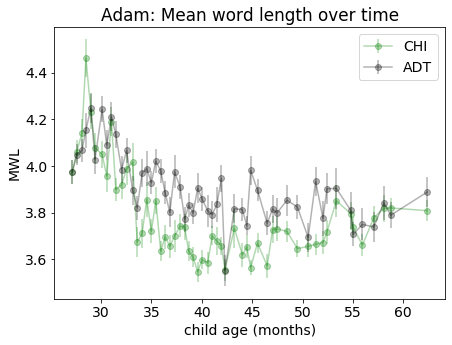

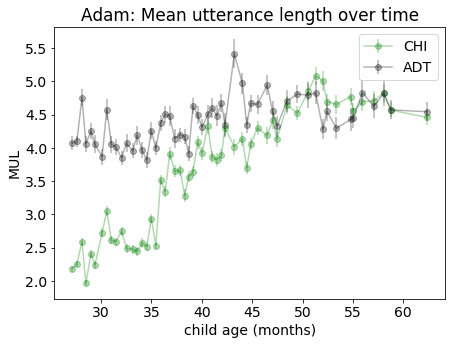

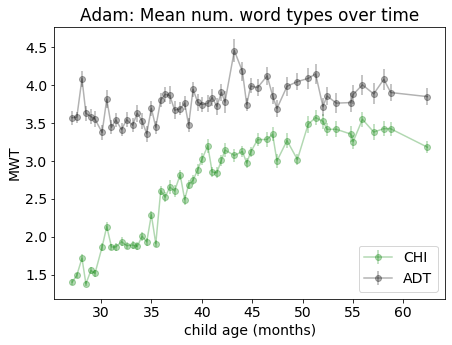

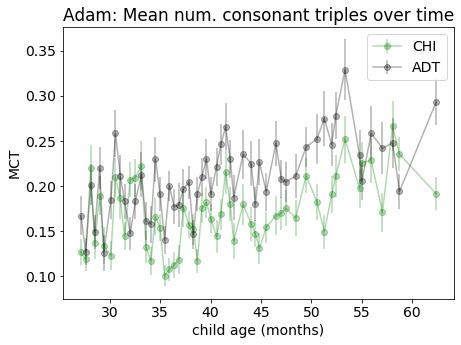

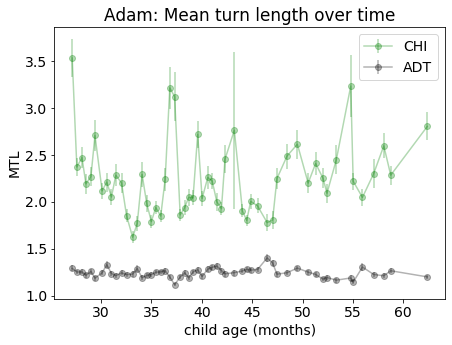

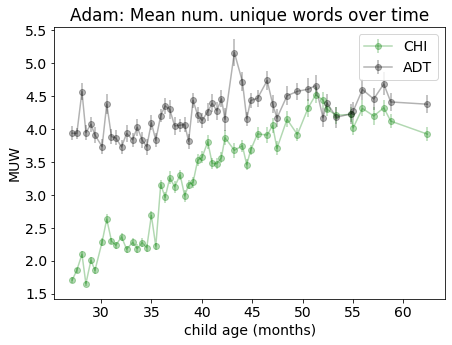

In [393]:
# # Plot for complexity measures - Adam - ADULT-CHILD
# create_plot_chi_adt_time('Adam', adam_measures, 'MWL')
# create_plot_chi_adt_time('Adam', adam_measures, 'MUL')
# create_plot_chi_adt_time('Adam', adam_measures, 'MWT')
# create_plot_chi_adt_time('Adam', adam_measures, 'MCT')
# create_plot_chi_adt_time('Adam', adam_measures, 'MTL')
# create_plot_chi_adt_time('Adam', adam_measures, 'MUW')

# Plot for complexity measures - Adam - CHILD-ADULT 
create_plot_chi_adt_time('Adam', adam_measures_child_adult, 'MWL', 'CHI-ADT')
create_plot_chi_adt_time('Adam', adam_measures_child_adult, 'MUL', 'CHI-ADT')
create_plot_chi_adt_time('Adam', adam_measures_child_adult, 'MWT', 'CHI-ADT')
create_plot_chi_adt_time('Adam', adam_measures_child_adult, 'MCT', 'CHI-ADT')
create_plot_chi_adt_time('Adam', adam_measures_child_adult, 'MTL', 'CHI-ADT')
create_plot_chi_adt_time('Adam', adam_measures_child_adult, 'MUW', 'CHI-ADT')

In [ ]:
create_plot_chi_adt_time('Adam', adam_measures, 'MTL')

## Sarah Plots (Global)

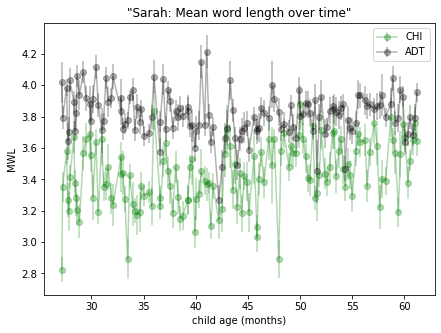

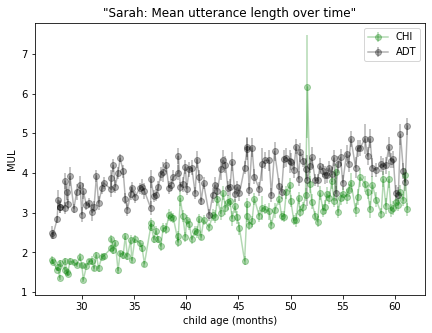

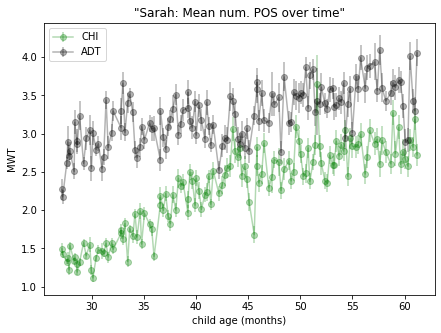

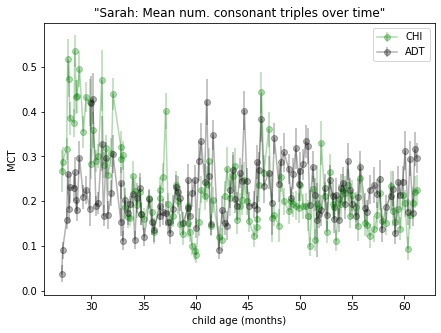

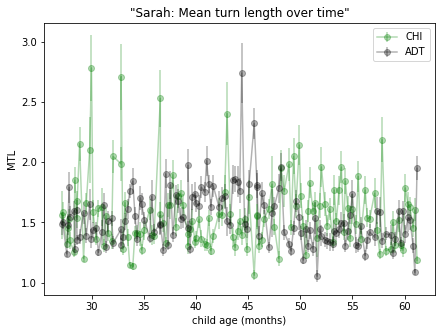

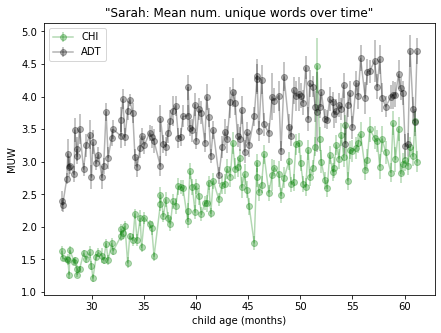

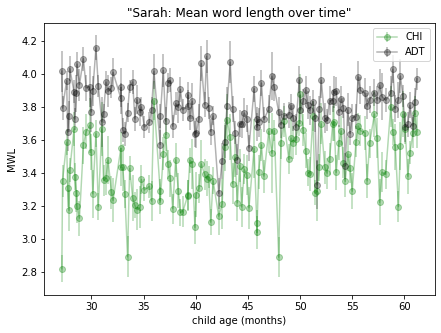

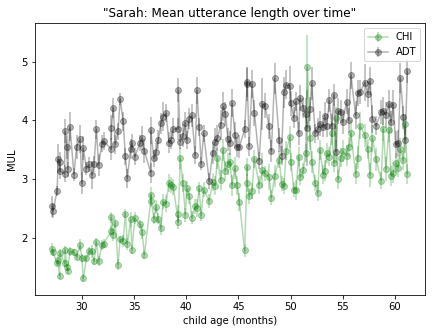

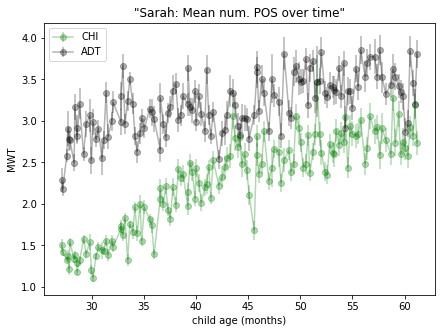

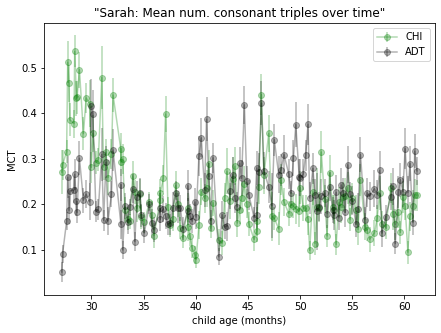

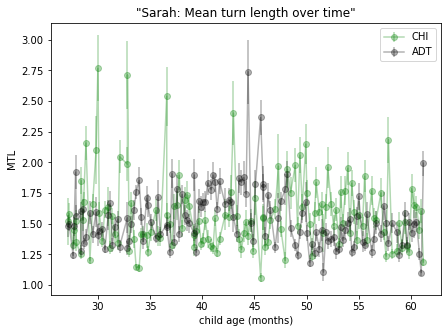

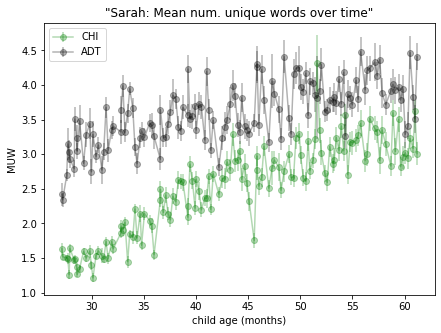

In [289]:

# # Plot for complexity measures - Sarah - ADULT-CHILD
create_plot_chi_adt_time('Sarah', sarah_measures, 'MWL')
create_plot_chi_adt_time('Sarah', sarah_measures, 'MUL')
create_plot_chi_adt_time('Sarah', sarah_measures, 'MWT')
create_plot_chi_adt_time('Sarah', sarah_measures, 'MCT')
create_plot_chi_adt_time('Sarah', sarah_measures, 'MTL')
create_plot_chi_adt_time('Sarah', sarah_measures, 'MUW')


# Plot for complexity measures - Sarah - CHILD-ADULT 
create_plot_chi_adt_time('Sarah', sarah_measures_child_adult, 'MWL', 'CHI-ADT')
create_plot_chi_adt_time('Sarah', sarah_measures_child_adult, 'MUL', 'CHI-ADT')
create_plot_chi_adt_time('Sarah', sarah_measures_child_adult, 'MWT', 'CHI-ADT')
create_plot_chi_adt_time('Sarah', sarah_measures_child_adult, 'MCT', 'CHI-ADT')
create_plot_chi_adt_time('Sarah', sarah_measures_child_adult, 'MTL', 'CHI-ADT')
create_plot_chi_adt_time('Sarah', sarah_measures_child_adult, 'MUW', 'CHI-ADT')

In [ ]:
# print(len(sarah_measures['MUL']['CHI']))
# print(len(sarah_measures_child_adult['MUL']['CHI']))
# sarah_measures['MUL'][CHI].keys()

----
# Local Measure Plots

In [436]:
from scipy import stats
from scipy.stats import linregress

# linregress_results = {}        
def save_linregress(metric, result):
    key = child + '_' + metric + '_' + turn_order
    linregress_results[key] = result
    print(key)
    print(result)

In [443]:
# plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams.update({'font.size': 14})
def plot_chi_adt_turn_complexity(child_m, adult_m, m_name, title, filename=False):
#     filename = False                                                                 #### CHANGE!
    plt.figure()
    plt.plot(adult_m, child_m, 'o', color='black');
    plt.xlabel('Adult ' + m_name)
    plt.ylabel('Child ' + m_name)
    plt.title(title)
    if filename:
        plt.savefig("figures/complexity/" + filename, dpi=300)
        plt.close()
    else:
        plt.show()
        

def plot_pearson_correlations(ages, pearson_scores, m_name, turn_order, title, filename=False):
#     filename = False                                                                 #### CHANGE!
    plt.figure()
    plt.plot(ages, pearson_scores, '-', color='black');
    plt.xlabel('child age (months)')
    plt.ylabel(m_name + " correlations (Pearson's r)") # ' + turn_order + "
#     plt.ylim(0, 0.5)
    plt.title(title)
    plt.tight_layout()
    if filename:
        plt.savefig("figures/complexity/" + filename, dpi=300)
        plt.close()
    else:
        plt.show()
        
    save_linregress(m_name, linregress(ages, pearson_scores))
        
    

In [446]:
child = 'Adam'
adult_turn_first = True
if child == 'Adam':
    ages = adam_ages
    if adult_turn_first:
        turn_order='ADT-CHI'
        postag_turn_pairs = adam_pos_turn_pairs
        sent_turn_pairs = adam_sent_turn_pairs
    else:
        turn_order='CHI-ADT'
        postag_turn_pairs = adam_pos_turn_pairs_child_adult
        sent_turn_pairs = adam_sent_turn_pairs_child_adult
        
elif child == 'Sarah':
    ages = sarah_ages
    if adult_turn_first:
        turn_order='ADT-CHI'
        postag_turn_pairs = sarah_pos_turn_pairs
        sent_turn_pairs = sarah_sent_turn_pairs
    else:
        turn_order='CHI-ADT'
        postag_turn_pairs = sarah_pos_turn_pairs_child_adult
        sent_turn_pairs = sarah_sent_turn_pairs_child_adult

        
# compute child's and adults' mean word type
mwordtype = word_type_metric(postag_turn_pairs, adult_turn_first)

# compute child's and adults' consonant triples
consonant_triples = consonant_triples_metric(sent_turn_pairs, adult_turn_first)  

# compute child's and adults' mean turn length (number of utterances per turn)
mturnlength = mean_turn_length_metric(sent_turn_pairs, adult_turn_first)    

# compute child's and adults' mean unique words per utterance in turn
muniquewords = mean_unique_words_turns(sent_turn_pairs, adult_turn_first) 

# compute child's and adults' mean word length in turn
mwordlength = mean_word_length_metric(sent_turn_pairs, adult_turn_first) #v3

# compute child's and adults' mean utterance length in turn
muttlength = mean_utt_length_metric(sent_turn_pairs, adult_turn_first) #v3

## MWT

In [428]:
mwt_pearsons = []
save = True
metric = 'MWT'

for age in ages:
    if save:
        filename='local/'+ child + '_' + turn_order + '_' + metric + '_' + str(age).replace('.', '-')
    title = child + ": Mean word type [age " + str(age) + "]"
    print(filename)

    mwt_age = mwordtype[age]
    plot_chi_adt_turn_complexity(mwt_age[1], mwt_age[0], metric, title, filename=filename)
    
    pearson_correlation = stats.pearsonr(mwt_age[1], mwt_age[0])
    mwt_pearsons.append(pearson_correlation)
    print('MWT pearson:', pearson_correlation)
    print()
    
    
### Plot of Pearson correlations  
mwt_pearson_scores, _ = zip(*mwt_pearsons)
filename='pearsons/'+ child + '_' + turn_order + '_' + metric + '_pearsons'
plot_pearson_correlations(ages, mwt_pearson_scores, 'MWT', turn_order,
                      title= child + " [" + turn_order + "]"+ ": Mean word type correlations", filename=filename)

local/Adam_CHI-ADT_MWT_27-13
MWT pearson: (0.06862205017402995, 0.19456327758205083)

local/Adam_CHI-ADT_MWT_27-59
MWT pearson: (0.033961089316077095, 0.4309407566242574)

local/Adam_CHI-ADT_MWT_28-1
MWT pearson: (0.133018442641116, 0.0130081995969742)

local/Adam_CHI-ADT_MWT_28-49
MWT pearson: (0.013268919481401922, 0.8029833464237596)

local/Adam_CHI-ADT_MWT_28-99
MWT pearson: (0.15088693290254668, 0.00323342574861504)

local/Adam_CHI-ADT_MWT_29-39
MWT pearson: (0.07346812254889343, 0.19922950281507218)

local/Adam_CHI-ADT_MWT_30-1
MWT pearson: (0.15699391677975605, 0.0013896498679579928)

local/Adam_CHI-ADT_MWT_30-56
MWT pearson: (0.03874831866874459, 0.5037571107564017)

local/Adam_CHI-ADT_MWT_31-03
MWT pearson: (0.05899071626281685, 0.22490044323543296)

local/Adam_CHI-ADT_MWT_31-46
MWT pearson: (0.12788754453462486, 0.00837845829604837)

local/Adam_CHI-ADT_MWT_32-03
MWT pearson: (0.13193504784766363, 0.00792469538090227)

local/Adam_CHI-ADT_MWT_32-53
MWT pearson: (0.0406085123584

## MCT

In [447]:
mct_pearsons = []
save = True
metric = 'MCT'
for age in ages:
    if save:
        filename='local/'+ child + '_' + turn_order + '_' + metric + '_' + str(age).replace('.', '-')
        print(filename)
    else:
        filename=None
    title = child + ": Mean consonant triples [age " + str(age) + "]"
    
    
    mct_age = consonant_triples[age]
    plot_chi_adt_turn_complexity(mct_age[1], mct_age[0], metric, title, filename=filename)
    
    pearson_correlation = stats.pearsonr(mct_age[1], mct_age[0])
    mct_pearsons.append(pearson_correlation)
    print('MCT pearson:', pearson_correlation)
    print()
    
    
    
### Plot of Pearson correlations
mct_pearson_scores, _ = zip(*mct_pearsons)
filename='pearsons/'+ child + '_' + turn_order + '_' + metric + '_pearsons'
plot_pearson_correlations(ages, mct_pearson_scores, 'MCT', turn_order,
                      title= child + " [" + turn_order + "]"+ ": Mean consonant triples", filename=filename)


local/Adam_ADT-CHI_MCT_27-13
MCT pearson: (0.17697412092910758, 0.0007699345706730993)

local/Adam_ADT-CHI_MCT_27-59
MCT pearson: (0.16743441048873403, 9.251060507584214e-05)

local/Adam_ADT-CHI_MCT_28-1
MCT pearson: (0.2976346369176703, 1.4336488926780064e-08)

local/Adam_ADT-CHI_MCT_28-49
MCT pearson: (0.20905818648626812, 7.048729158241326e-05)

local/Adam_ADT-CHI_MCT_28-99
MCT pearson: (0.3033856243840486, 1.7285085995187873e-09)

local/Adam_ADT-CHI_MCT_29-39
MCT pearson: (0.12465251863028512, 0.028984092810234816)

local/Adam_ADT-CHI_MCT_30-1
MCT pearson: (0.2776251944363182, 9.978097065342047e-09)

local/Adam_ADT-CHI_MCT_30-56
MCT pearson: (0.13697098737780278, 0.017610804576623222)

local/Adam_ADT-CHI_MCT_31-03
MCT pearson: (0.07037914851859373, 0.14749774826131873)

local/Adam_ADT-CHI_MCT_31-46
MCT pearson: (0.10735002714948423, 0.027081743288783055)

local/Adam_ADT-CHI_MCT_32-03
MCT pearson: (0.15215521814003904, 0.0021645012807599154)

local/Adam_ADT-CHI_MCT_32-53
MCT pearson

## MTL

In [430]:
mtl_pearsons = []
save = True
metric = 'MTL'
for age in ages:
    if save:
        filename='local/'+ child + '_' + turn_order + '_' + metric + '_' + str(age).replace('.', '-')
        print(filename)
    else:
        filename=None
    title = child + ": Mean turn length [age " + str(age) + "]"
    
    mtl_age = mturnlength[age]
    plot_chi_adt_turn_complexity(mtl_age[1], mtl_age[0], metric, title, filename=filename)
    
    pearson_correlation = stats.pearsonr(mtl_age[1], mtl_age[0])
    mtl_pearsons.append(pearson_correlation)
    print('MTL pearson:', pearson_correlation)
    print()
    
    
    
### Plot of Pearson correlations
mtl_pearson_scores, _ = zip(*mtl_pearsons)
filename='pearsons/'+ child + '_' + turn_order + '_' + metric + '_pearsons'
plot_pearson_correlations(ages, mtl_pearson_scores, 'MTL', turn_order,
                      title= child + " [" + turn_order + "]"+ ": Mean turn length correlations", filename=filename)

local/Adam_CHI-ADT_MTL_27-13
MTL pearson: (-0.04992609459538334, 0.34555111247284415)

local/Adam_CHI-ADT_MTL_27-59
MTL pearson: (-0.00909000517949042, 0.8330843071275935)

local/Adam_CHI-ADT_MTL_28-1
MTL pearson: (-0.0012249943292476605, 0.9818339280597941)

local/Adam_CHI-ADT_MTL_28-49
MTL pearson: (-0.06707084998755199, 0.2067827240573369)

local/Adam_CHI-ADT_MTL_28-99
MTL pearson: (0.0015827382723734781, 0.9755001257210807)

local/Adam_CHI-ADT_MTL_29-39
MTL pearson: (-0.054350971286836164, 0.34255809561691086)

local/Adam_CHI-ADT_MTL_30-1
MTL pearson: (0.07048994754954954, 0.15322863431201741)

local/Adam_CHI-ADT_MTL_30-56
MTL pearson: (-0.09888627340126935, 0.08730226133456064)

local/Adam_CHI-ADT_MTL_31-03
MTL pearson: (0.144405494041986, 0.0028461629603171515)

local/Adam_CHI-ADT_MTL_31-46
MTL pearson: (0.06820939945001578, 0.16091391859672716)

local/Adam_CHI-ADT_MTL_32-03
MTL pearson: (-0.03565009840187065, 0.47487785072729566)

local/Adam_CHI-ADT_MTL_32-53
MTL pearson: (-0.08

## MWL

In [431]:
mwl_pearsons = []
save = True
metric = 'MWL'
for age in ages:
    if save:
        filename='local/'+ child + '_' + turn_order + '_' + metric + '_' + str(age).replace('.', '-')
        print(filename)
    else:
        filename=None
    title = child + ": Mean word length [age " + str(age) + "]"
    
    mwl_age = mwordlength[age]

    plot_chi_adt_turn_complexity(mwl_age[1], mwl_age[0], metric, title, filename=filename)
    
    pearson_correlation = stats.pearsonr(mwl_age[1], mwl_age[0])
    mwl_pearsons.append(pearson_correlation)
    print('MWL pearson:', pearson_correlation)
    print()
    
    
    
### Plot of Pearson correlations
mwl_pearson_scores, _ = zip(*mwl_pearsons)
filename='pearsons/'+ child + '_' + turn_order + '_' + metric + '_pearsons'
plot_pearson_correlations(ages, mwl_pearson_scores, 'MWL', turn_order,
                      title= child + " [" + turn_order + "]"+ ": Mean word length correlations", filename=filename)

local/Adam_CHI-ADT_MWL_27-13
MWL pearson: (0.20435755531645672, 9.629140657923257e-05)

local/Adam_CHI-ADT_MWL_27-59
MWL pearson: (0.04806856627234776, 0.2648209597316791)

local/Adam_CHI-ADT_MWL_28-1
MWL pearson: (0.2289516758308277, 1.6098392025402474e-05)

local/Adam_CHI-ADT_MWL_28-49
MWL pearson: (0.3249746513162243, 3.356560209182963e-10)

local/Adam_CHI-ADT_MWL_28-99
MWL pearson: (0.3339782001235577, 2.507133997453756e-11)

local/Adam_CHI-ADT_MWL_29-39
MWL pearson: (0.2661051307989547, 2.2556365308115963e-06)

local/Adam_CHI-ADT_MWL_30-1
MWL pearson: (0.3307818151837249, 5.634282047940682e-12)

local/Adam_CHI-ADT_MWL_30-56
MWL pearson: (0.3032949656938574, 8.413642214352322e-08)

local/Adam_CHI-ADT_MWL_31-03
MWL pearson: (0.2341094952792865, 1.0605512795250916e-06)

local/Adam_CHI-ADT_MWL_31-46
MWL pearson: (0.1151030496806647, 0.017739776870143747)

local/Adam_CHI-ADT_MWL_32-03
MWL pearson: (0.24237356404798766, 8.212147844561751e-07)

local/Adam_CHI-ADT_MWL_32-53
MWL pearson: (

## MUL

In [432]:
mul_pearsons = []
save = True
metric = 'MUL'
for age in ages:
    if save:
        filename='local/'+ child + '_' + turn_order + '_' + metric + '_' + str(age).replace('.', '-')
        print(filename)
    else:
        filename=None
    title = child + ": Mean utterance length [age " + str(age) + "]"
    
    mul_age = muttlength[age]

    plot_chi_adt_turn_complexity(mul_age[1], mul_age[0], metric, title, filename=filename)
    
    pearson_correlation = stats.pearsonr(mul_age[1], mul_age[0])
    mul_pearsons.append(pearson_correlation)
    print('MUL pearson:', pearson_correlation)
    print()

    
    
    
### Plot of Pearson correlations
mul_pearson_scores, _ = zip(*mul_pearsons)
filename='pearsons/'+ child + '_' + turn_order + '_' + metric + '_pearsons'
plot_pearson_correlations(ages, mul_pearson_scores, 'MUL', turn_order,
                      title= child + " [" + turn_order + "]"+ ": Mean utterance length correlations", filename=filename)

local/Adam_CHI-ADT_MUL_27-13
MUL pearson: (0.08621772457905574, 0.10290429971034877)

local/Adam_CHI-ADT_MUL_27-59
MUL pearson: (0.09632784756354056, 0.025189938011252713)

local/Adam_CHI-ADT_MUL_28-1
MUL pearson: (0.184696315712064, 0.0005343721710936804)

local/Adam_CHI-ADT_MUL_28-49
MUL pearson: (0.130868604634523, 0.013466937978416875)

local/Adam_CHI-ADT_MUL_28-99
MUL pearson: (0.11372411489939208, 0.026839381240971474)

local/Adam_CHI-ADT_MUL_29-39
MUL pearson: (0.09846442363320898, 0.08499960953596473)

local/Adam_CHI-ADT_MUL_30-1
MUL pearson: (0.12290673098954943, 0.012538077539484447)

local/Adam_CHI-ADT_MUL_30-56
MUL pearson: (0.05441106523107811, 0.3476337719993345)

local/Adam_CHI-ADT_MUL_31-03
MUL pearson: (0.12157053814143254, 0.012135862170921583)

local/Adam_CHI-ADT_MUL_31-46
MUL pearson: (0.23352398046624268, 1.1635899811510678e-06)

local/Adam_CHI-ADT_MUL_32-03
MUL pearson: (0.1997471903657568, 5.271597198941561e-05)

local/Adam_CHI-ADT_MUL_32-53
MUL pearson: (0.09123

## MUW

In [433]:
muw_pearsons = []
save = True
metric = 'MUW'
for age in ages:
    if save:
        filename='local/'+ child + '_' + turn_order + '_' + metric + '_' + str(age).replace('.', '-')
        print(filename)
    else:
        filename=None
    title = child + ": Mean num. unique words [age " + str(age) + "]"
    
    muw_age = muniquewords[age]

    plot_chi_adt_turn_complexity(muw_age[1], muw_age[0], metric, title, filename=filename)
    
    pearson_correlation = stats.pearsonr(muw_age[1], muw_age[0])
    muw_pearsons.append(pearson_correlation)
    print('MUW pearson:', pearson_correlation)
    print()
    
    
    
### Plot of Pearson correlations
muw_pearson_scores, _ = zip(*muw_pearsons)
filename='pearsons/'+ child + '_' + turn_order + '_' + metric + '_pearsons'
plot_pearson_correlations(ages, muw_pearson_scores, 'MUW', turn_order,
                      title= child + " [" + turn_order + "]"+ ": Mean num. unique words correlations", filename=filename)

local/Adam_CHI-ADT_MUW_27-13
MUW pearson: (0.06098460635025987, 0.24910063884235767)

local/Adam_CHI-ADT_MUW_27-59
MUW pearson: (0.052335410051849336, 0.22467936606247477)

local/Adam_CHI-ADT_MUW_28-1
MUW pearson: (0.16288330341817026, 0.002303726888982183)

local/Adam_CHI-ADT_MUW_28-49
MUW pearson: (0.1261218140976177, 0.017274769991299004)

local/Adam_CHI-ADT_MUW_28-99
MUW pearson: (0.13194480251594087, 0.010127126837363325)

local/Adam_CHI-ADT_MUW_29-39
MUW pearson: (0.03271350290262533, 0.5679986096236032)

local/Adam_CHI-ADT_MUW_30-1
MUW pearson: (0.10877161440147036, 0.027267378747294943)

local/Adam_CHI-ADT_MUW_30-56
MUW pearson: (0.042738897432003306, 0.46081461662017575)

local/Adam_CHI-ADT_MUW_31-03
MUW pearson: (0.07417607872567394, 0.126815908880422)

local/Adam_CHI-ADT_MUW_31-46
MUW pearson: (0.2040416680817106, 2.2988437583363367e-05)

local/Adam_CHI-ADT_MUW_32-03
MUW pearson: (0.15852565790102285, 0.0013901401268755266)

local/Adam_CHI-ADT_MUW_32-53
MUW pearson: (0.08028

### Linregress Results - Pearson Correlation Plots

In [285]:
linregress_results

{'Adam_MWT_ADT-CHI': LinregressResult(slope=-0.0023637268748407606, intercept=0.11826442163146457, rvalue=-0.39592272781131327, pvalue=0.002770544224589269, stderr=0.0007530535539113173),
 'Adam_MCT_ADT-CHI': LinregressResult(slope=-0.0017796042904949507, intercept=0.21708490972868463, rvalue=-0.2292386654260105, pvalue=0.09227222831138296, stderr=0.0010379482574760727),
 'Adam_MTL_ADT-CHI': LinregressResult(slope=0.00033834188937672817, intercept=-0.022592480939401995, rvalue=0.04959204692555413, pvalue=0.719177513042747, stderr=0.0009359897604159998),
 'Adam_MWL_ADT-CHI': LinregressResult(slope=-0.0011726227087156416, intercept=0.1637423800889816, rvalue=-0.1348794182737087, pvalue=0.32619206507362897, stderr=0.001183280924686418),
 'Adam_MUL_ADT-CHI': LinregressResult(slope=-0.003014195355210571, intercept=0.15550967645505903, rvalue=-0.4818844483861366, pvalue=0.0001952489066837265, stderr=0.000752854472830742),
 'Adam_MUW_ADT-CHI': LinregressResult(slope=-0.002946526936355743, int

In [286]:
lr = pd.DataFrame(linregress_results, index=['slope', 'intercept', 'rvalue', 'pvalue', 'stderr']).transpose()
lr

,slope,intercept,rvalue,pvalue,stderr
Adam_MWT_ADT-CHI,-0.002364,0.118264,-0.395923,0.002771,0.000753
Adam_MCT_ADT-CHI,-0.001780,0.217085,-0.229239,0.092272,0.001038
Adam_MTL_ADT-CHI,0.000338,-0.022592,0.049592,0.719178,0.000936
Adam_MWL_ADT-CHI,-0.001173,0.163742,-0.134879,0.326192,0.001183
Adam_MUL_ADT-CHI,-0.003014,0.155510,-0.481884,0.000195,0.000753
Adam_MUW_ADT-CHI,-0.002947,0.144407,-0.447552,0.000613,0.000809
Sarah_MWT_ADT-CHI,-0.000891,0.022240,-0.091713,0.282919,0.000826
Sarah_MCT_ADT-CHI,-0.002174,0.165272,-0.215935,0.010679,0.000840
Sarah_MTL_ADT-CHI,-0.000106,-0.029686,-0.014465,0.865789,0.000624
Sarah_MWL_ADT-CHI,-0.003076,0.221089,-0.280161,0.000837,0.000900


In [287]:
# lr.to_csv('linregress_pearson_ADT-CHI.csv')

----
----
### SAVE MEASURES TO CSV

In [170]:
import pandas as pd
child = 'Sarah'
print(child)
if child == "Sarah":
    csv_file = 'sarah_measures_child_adult.csv'
    measures_dict = dict(sarah_measures_child_adult)
elif child == "Adam":
    csv_file = 'adam_measures_child_adult.csv'
    measures_dict = dict(adam_measures_child_adult)

measures_dict.keys()

Sarah


dict_keys(['MWT', 'MCT', 'MTL', 'MUW', 'MWL', 'MUL', 'ages'])

In [171]:
measures_dict['ages']

[27.16,
 27.23,
 27.62,
 27.72,
 27.85,
 27.92,
 28.33,
 28.39,
 28.56,
 28.62,
 28.85,
 29.23,
 29.49,
 29.82,
 29.99,
 30.13,
 30.43,
 30.66,
 30.99,
 31.16,
 31.39,
 31.59,
 31.92,
 32.07,
 32.82,
 32.83,
 33.0,
 33.2,
 33.46,
 33.66,
 33.95,
 34.16,
 34.36,
 34.66,
 34.79,
 35.07,
 35.56,
 35.76,
 35.99,
 36.59,
 36.6,
 36.89,
 37.1,
 37.33,
 37.56,
 37.79,
 38.07,
 38.33,
 38.53,
 38.76,
 39.23,
 39.239999999999995,
 39.43,
 39.66,
 39.92,
 40.03,
 40.3,
 40.53,
 40.85,
 41.03,
 41.23,
 41.43,
 41.66,
 42.2,
 42.53,
 42.76,
 42.99,
 43.3,
 43.53,
 43.76,
 43.99,
 44.2,
 44.39,
 44.66,
 44.89,
 45.1,
 45.59,
 45.85,
 45.86,
 46.03,
 46.3,
 46.53,
 46.99,
 47.3,
 47.53,
 47.95,
 48.16,
 48.46,
 48.92,
 49.13,
 49.36,
 49.59,
 49.92,
 50.03,
 50.3,
 50.53,
 50.76,
 50.92,
 51.23,
 51.43,
 51.62,
 51.85,
 52.03,
 52.36,
 52.59,
 52.82,
 53.13,
 53.26,
 53.46,
 53.72,
 53.95,
 54.16,
 54.33,
 54.56,
 54.79,
 55.0,
 55.36,
 55.56,
 55.79,
 56.23,
 56.43,
 56.66,
 57.13,
 57.39,
 57.62,


In [172]:
MWT = pd.DataFrame.from_dict(measures_dict['MWT'])
MCT = pd.DataFrame.from_dict(measures_dict['MCT'])
MTL = pd.DataFrame.from_dict(measures_dict['MTL'])
MUW = pd.DataFrame.from_dict(measures_dict['MUW'])
MWL = pd.DataFrame.from_dict(measures_dict['MWL'])
MUL = pd.DataFrame.from_dict(measures_dict['MUL'])
AGE = pd.DataFrame(measures_dict['ages'])

header_names = ['MWT_CHI', 'MWT_ADT', 'MCT_CHI', 'MCT_ADT', 'MTL_CHI', 'MTL_ADT', 'MUW_CHI', 'MUW_ADT', 'MWL_CHI', 'MWL_ADT', 'MUL_CHI', 'MUL_ADT', 'ages']
df = pd.concat([MWT, MCT, MTL, MUW, MWL, MUL], axis=1)
# df.columns = header_names
df


,CHI,ADT,CHI,ADT,CHI,ADT,CHI,ADT,CHI,ADT,CHI,ADT
0,"(1.5013425393172226, 0.0803273474629572)","(2.2860759493670884, 0.1460886089902394)","(0.27042577675489066, 0.047750139903058104)","(0.05063291139240506, 0.02298599071208905)","(1.518987341772152, 0.19434462070114564)","(1.481012658227848, 0.09103503095322164)","(1.6324319140774837, 0.08988364322350717)","(2.421097046413502, 0.16661931412477243)","(2.8200207912921176, 0.08306511099905935)","(4.015608859577586, 0.12493277346059299)","(1.8044687380130415, 0.10374679677507595)","(2.535864978902954, 0.1764265879006452)"
1,"(1.417474276142618, 0.044186015810350546)","(2.1781407035175877, 0.08841360236849156)","(0.28667743479301266, 0.03267674151965019)","(0.09036850921273032, 0.01934483786196179)","(1.5829145728643217, 0.0859255207136673)","(1.4974874371859297, 0.057239852287073886)","(1.5179827709978464, 0.049052152672631015)","(2.342043551088777, 0.10196629615353887)","(3.3521028855067465, 0.09609303376478712)","(3.7924039124253612, 0.07365088228992209)","(1.752650155539603, 0.0575125542219279)","(2.4578726968174203, 0.11441797737144063)"
2,"(1.3295647558386412, 0.034807755967705314)","(2.5796178343949046, 0.07760158253086703)","(0.3153927813163482, 0.025185770226626283)","(0.1624203821656051, 0.02033536527497016)","(1.3248407643312101, 0.0383313353512541)","(1.2420382165605095, 0.029808150872989218)","(1.5016454352441613, 0.04255026628271686)","(2.698513800424628, 0.08658157930661671)","(3.5861671767722725, 0.07736336518606285)","(3.9580298786181136, 0.05718207192944704)","(1.5650212314225056, 0.043367030039610954)","(2.7998938428874736, 0.09065385417190673)"
3,"(1.3700980392156863, 0.07450562503879282)","(2.9076797385620914, 0.20778605183302643)","(0.5119281045751635, 0.04623598513314321)","(0.25898692810457513, 0.046243661231109276)","(1.4509803921568627, 0.11652029950250654)","(1.4803921568627452, 0.07810027190428354)","(1.4926470588235294, 0.085295549260959)","(3.148692810457516, 0.2266317705235018)","(3.3059679427326483, 0.11262902878201841)","(3.646702876682237, 0.11659663947134224)","(1.6174836601307188, 0.08773714909375754)","(3.3480392156862746, 0.24833755578689812)"
4,"(1.2103117505995205, 0.06148364818340071)","(2.782873701039169, 0.14533039833708827)","(0.4657074340527578, 0.040412750709033794)","(0.18635091926458833, 0.030592808219566097)","(1.525179856115108, 0.08712520431442763)","(1.920863309352518, 0.1365257423311682)","(1.2603117505995205, 0.06171191442276)","(3.0366906474820143, 0.1659791752294995)","(3.1735811350919265, 0.12434610758170586)","(3.74143538047765, 0.09203496957892127)","(1.3569544364508395, 0.06279927211009212)","(3.291906474820144, 0.1736009396281158)"
...,...,...,...,...,...,...,...,...,...,...,...,...
134,"(2.5734920634920635, 0.13525009195403073)","(2.9713520408163263, 0.16566915071927377)","(0.09404761904761905, 0.025489021817954326)","(0.2253061224489796, 0.0366123193370662)","(1.65, 0.09945001821241149)","(1.5, 0.11450871101343855)","(2.938531746031746, 0.14809503830770357)","(3.4132568027210883, 0.19990287502489118)","(3.378519843437076, 0.10505741325283491)","(3.692935490278684, 0.07559572863333311)","(3.1952380952380945, 0.16364205220665293)","(3.606768707482993, 0.22402610877481302)"
135,"(2.9212010919017293, 0.14242059865667903)","(3.8400060661207154, 0.1863422638112562)","(0.173036093418259, 0.03189611768353871)","(0.2891264786169245, 0.03867108109848756)","(1.6369426751592357, 0.08647085820200034)","(1.515923566878981, 0.0818688640222649)","(3.22791932059448, 0.15388587294220932)","(4.469745222929936, 0.2375934209568852)","(3.5218050709603945, 0.06892466361077824)","(3.809214256327339, 0.07807724957317932)","(3.5169396420988774, 0.17873711839165374)","(4.717015468607825, 0.25290737965754356)"
136,"(2.824047619047619, 0.12773544544613924)","(3.4563809523809526, 0.157830396314043)","(0.1957142857142857, 0.035716625773677846)","(0.15942857142857142, 0.026506832950537552)","(1.4514285714285715, 0.07391934774364207)","(1.25142857142857

In [147]:
# MUW

In [173]:
df = df.applymap(lambda x: x[0])
df_final = pd.concat([df, AGE], axis=1)
df_final.columns = header_names

df_final

,MWT_CHI,MWT_ADT,MCT_CHI,MCT_ADT,MTL_CHI,MTL_ADT,MUW_CHI,MUW_ADT,MWL_CHI,MWL_ADT,MUL_CHI,MUL_ADT,ages
0,1.501343,2.286076,0.270426,0.050633,1.518987,1.481013,1.632432,2.421097,2.820021,4.015609,1.804469,2.535865,27.16
1,1.417474,2.178141,0.286677,0.090369,1.582915,1.497487,1.517983,2.342044,3.352103,3.792404,1.752650,2.457873,27.23
2,1.329565,2.579618,0.315393,0.162420,1.324841,1.242038,1.501645,2.698514,3.586167,3.958030,1.565021,2.799894,27.62
3,1.370098,2.907680,0.511928,0.258987,1.450980,1.480392,1.492647,3.148693,3.305968,3.646703,1.617484,3.348039,27.72
4,1.210312,2.782874,0.465707,0.186351,1.525180,1.920863,1.260312,3.036691,3.173581,3.741435,1.356954,3.291906,27.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2.573492,2.971352,0.094048,0.225306,1.650000,1.500000,2.938532,3.413257,3.378520,3.692935,3.195238,3.606769,60.33
135,2.921201,3.840006,0.173036,0.289126,1.636943,1.515924,3.227919,4.469745,3.521805,3.809214,3.516940,4.717015,60.53
136,2.824048,3.456381,0.195714,0.159429,1.451429,1.251429,3.082381,3.820667,3.643098,3.683997,3.317619,4.049524,60.82
137,3.186481,3.201977,0.220675,0.316384,1.604520,1.101695,3.620729,3.512712,3.760494,3.829876,3.940409,3.666667,60.99


In [174]:
df_final.to_csv(csv_file)

----
----

In [ ]:
# Mean Turn Length Global Plots

mtl_chi = adam_measures['MTL']['CHI']
mtl_adt = adam_measures['MTL']['ADT']
plot_chi_adt(mtl_chi, mtl_adt, 'MTL',
             title="Adam: Child vs. Adult mean turn lengths")


plot_chi_adt_time(adam_ages, mtl_chi, mtl_adt, 'MTL',
                  title="Adam: Mean turn length over time") #, filename="Adam_CHI-ADT_time_MTL.png"


# Mean Consonant Triples Plots

ct_chi = adam_measures['CT']['CHI']
ct_adt = adam_measures['CT']['ADT']

plot_chi_adt_time(adam_ages, ct_chi, ct_adt, 'MCT',
                  title="Adam: Mean num. of consonant triples over time") #, filename="Adam_CHI-ADT_time_MCT.png"


# Mean Word Types Plots

wt_chi = adam_measures['WT']['CHI']
wt_adt = adam_measures['WT']['ADT']

plot_chi_adt_time(adam_ages, wt_chi, wt_adt, 'MWT',
                  title="Adam: Mean num. of POS over time", filename="Adam_CHI-ADT_time_MWT.png") #, filename="Adam_CHI-ADT_time_MWT.png"

In [ ]:
plt.show()
filename="Adam_CHI-ADT_time_MWT.png"
plt.savefig(filename, dpi=300)
plt.close()